## Описание исходных данных:

### Зависимые переменные (ЗП):
1. `Срок эксплуатации троника`
1. `Начало дефекта, ч`
1. `Длина, мм`
1. `Глубина, мм`
1. `Относительная глубина дефекта, %`
1. `Количество дефектов`


### Независимые переменные (НП):
1. `Завод изготовитель`
1. `Вид дефекта`
1. `Расположение дефекта` 
1. `Тип накладки`
1. `Расположение тройника на КС`
1. `Расположение дефекта по DN`
1. `Тип_по_DN`

### План

1. **Препроцессинг данных:**
    - Посмотрим на данные
    
    
2. **Формулировка гипотез:**
    - Сформулируем предположения
    - Выберем метрику
    - Построим графики

    
3. **Тестируем гипотезы:**
     - Выбираем подходящий тест
     - Тестируем
     
     
4. **Подводим итоги:**
    - Сформулировать выводы
    - Какие действия нужно предпринять разработчикам/бизнесу.

## Импорт библиотек

In [317]:
# Анализ данных
import pandas as pd
import statsmodels.api as sm 
import statsmodels.formula.api as sf
import numpy as np
import pingouin as pg

# Визуализация данных
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [318]:
def create_countplot_with_customization(data, 
                                       x_column, 
                                       title=None, 
                                       x_label=None,
                                       annotate=True,
                                       x_size=16,
                                       y_size=8,
                                       h=50):
    

    plt.figure(figsize=(x_size, y_size))
    ax = sns.countplot(data=data, x=x_column)

    # Подпись графика (используем значение по умолчанию, если не указано пользователем)
    if title is not None:
        plt.title(title)
    if x_label is not None:
        plt.xlabel(x_label)
    
    # Значения столбцов
    if annotate:
        for p in ax.patches:
            ax.annotate(f'{round(p.get_height(),1)}', (p.get_x() + p.get_width() / 2., p.get_height() + h), ha='center', va='baseline', fontsize=12, color='black')


## Импорт исходных данных

In [319]:
pd.set_option('display.max_columns',61)

In [320]:
#Данные без фильтрации по относительной глубине > 0.365
df_TCN = pd.read_excel('df_TCN.xlsx', sheet_name=2)
df_TCN.head()

,п/п,п/п тройника,ЛПУМГ,КС,МГ,км/КЦ,Объект привязки,Место установки,"Подземный, надземный",Тип тройника,"DN обечайки, мм","DN ответвления, мм","толщина стенки обечайки, мм","толщина стенки ответвления, мм",Марка стали обечайка,Марка стали ответвление,Центр ответственности,Завод изготовитель,ТУ,Год выпуска,Год ввода в эксплуатацию,Срок эксплуатации троника,"Проектное давление, МПа","Максимальное разрешенное рабочее давление, МПа",менее 10% от проектного давления,10% и более от проектного давления,в проектном,в пропускном,в отключенном состоянии под давлением,в отключенном состоянии без давления,"Удельное сопротивление грунта в районе пролегания трубопровода (минимальное), Ом*м",КР,ВТД,"ВИК, ВК, МК",УЗК,РК (кольцевых стыков),№ Элемента,№ дефекта п/п,Вид дефекта,Начало,Конец,"Длина, мм","Ширина, мм","Глубина, мм",Расположение дефекта,Результат обследования,Наименование организации проводившей обследование,"Планируемый срок проведения ЭПБ, согласно НД и результатам предыдущей, год",Примечание,Тип накладки,Паспорт,Грубая_I,Средняя_II,Тонкая_III,DN_для расчета длины дефекта,Расположение дефекта по DN,Пересчет_Конец,dt,12-dt,"Относительная глубина дефекта, %",Тип_по_DN
0,230,194,Ныдинское,Ныдинская,Ямбург-Елец 1,1,Вх. кол. ПУ,0,Надземный,ТСН,1400,1400,26.0,14.3,15ХСНД,15ХСНД,ГКС,ВПО Сибгазификация,51-29-81,NaN,1986-01-01,37,7.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01,2021-04-01,NaN,NaN,9.8,1,Трещиноподобный дефект,3.0,3.0,25.0,1.0,3.0,Сварное соединение накладка магистрали-магистраль,Замена,Общество,NaN,NaN,Накладка магистрали-ответвления,П,ПУ,Вх,NaN,1400,Обечайка,3.068209,0.068209,11.931791,0.115385,Равнопроходной
1,232,196,Ныдинское,Ныдинская,Ямбург-Елец 1,1,Вых. ГПА 11,Люк-лаз,Надземный,ТСН,700,500,26.0,14.3,15ХСНД,15ХСНД,ГКС,ВПО Сибгазификация,51-29-81,NaN,1986-01-01,37,7.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01,2021-04-01,NaN,NaN,21.8,1,Трещиноподобный дефект,11.5,11.5,25.0,1.0,2.0,Сварное соединение накладка ответвления-ответв...,Замена,Общество,NaN,NaN,Накладка ответвления,П,ГПА,Вых,Люк-лаз,500,Ответвление,11.690986,0.190986,11.809014,0.139860,Неравнопроходной
2,234,196,Ныдинское,Ныдинская,Ямбург-Елец 1,1,Вых. ГПА 11,Люк-лаз,Надземный,ТСН,700,500,26.0,14.3,15ХСНД,15ХСНД,ГКС,ВПО Сибгазификация,51-29-81,NaN,1986-01-01,37,7.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01,2021-04-01,NaN,NaN,21.8,3,Зона трещин,2.9,2.9,400.0,1.0,12.0,Сварное соединение накладка магистрали-магистраль,Замена,Общество,NaN,NaN,Накладка ответвления,П,ГПА,Вых,Люк-лаз,700,Обечайка,5.082696,2.182696,9.817304,0.461538,Неравнопроходной
3,248,202,Ныдинское,Ныдинская,Ямбург-Елец 1,1,Вх. ГПА 11,Люк-лаз,Надземный,ТСН,700,500,26.0,14.3,15ХСНД,15ХСНД,ГКС,ВПО Сибгазификация,51-29-81,NaN,1986-01-01,37,7.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01,2021-04-01,NaN,NaN,22.9,1,Трещиноподобный дефект,11.0,11.0,60.0,1.0,1.0,Сварное соединение накладка ответвления-ответв...,Замена,Общество,NaN,NaN,Накладка ответвления,П,ГПА,Вх,Люк-лаз,500,Ответвление,11.458366,0.458366,11.541634,0.069930,Неравнопроходной
4,269,212,Ныдинское,Ныдинская,Ямбург-Елец 2,2,Линия 84 крана,NaN,Подземный,ТСН,1000,1000,24.0,24.0,09Г2С,09Г2С,ГКС,ВПО Сибгазификация,51-29-81,NaN,1987-01-01,36,7.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01,2021-09-26,NaN,NaN,9.10,1,Трещиноподобный дефект,12.2,12.2,10.0,1.0,4.0,Сварное соединение накладка магистрали-магистраль,Замена,"ООО ""ЭНТЭ"", Общество",NaN,NaN,Накладка магистрали,NaN,Коллектор высокого давления,Линия крана №84,NaN,1000,Обечайка,12.238197,0.038197,11.961803,0.166667,Равнопроходной


In [321]:
df_TCN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 61 columns):
 #   Column                                                                              Non-Null Count  Dtype         
---  ------                                                                              --------------  -----         
 0   п/п                                                                                 457 non-null    int64         
 1   п/п тройника                                                                        457 non-null    int64         
 2   ЛПУМГ                                                                               457 non-null    object        
 3   КС                                                                                  457 non-null    object        
 4   МГ                                                                                  457 non-null    object        
 5   км/КЦ                                             

### Фильтрация по относиетльной глубине < 75 процентиля

В соответствии с ранее проведенным анализом по выявлению значительных отклонений при определении глубины дефекта, выполнена фильтрация по 75 процентилю относительной глубины.

In [322]:
OG = df_TCN[ 'Относительная глубина дефекта, %' ]

In [323]:
q_75 = OG.quantile(0.975)

In [324]:
df_TCN_75 = df_TCN[ (OG  < q_75) & ~(df_TCN['Центр ответственности'].str.contains('ЛЭС', case=False))] #Данные c фильтрации по относительной глубине > 0.975

(0.0, 1.0)

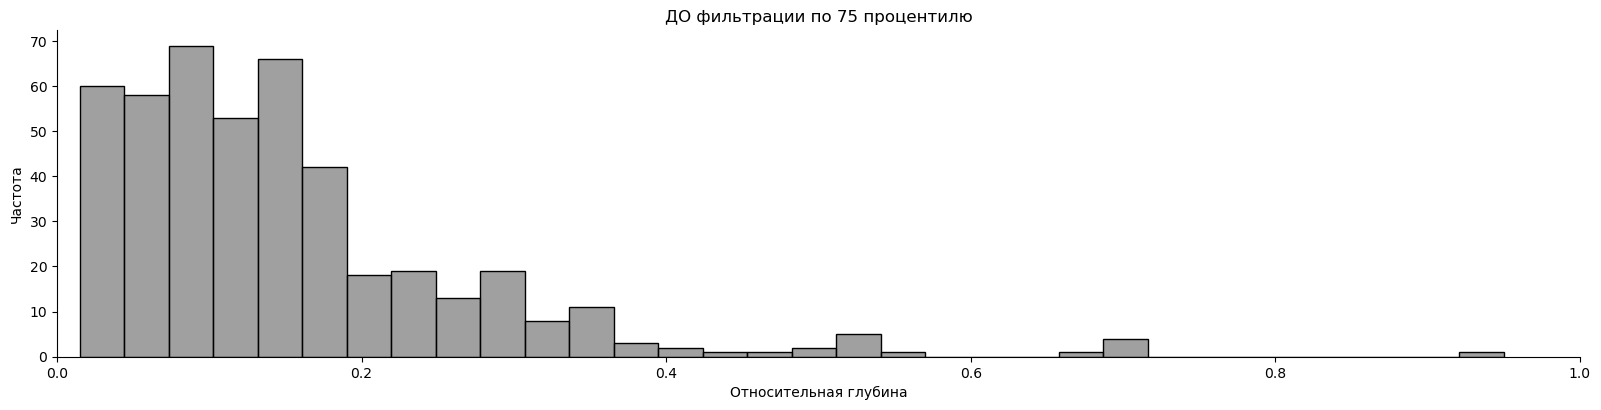

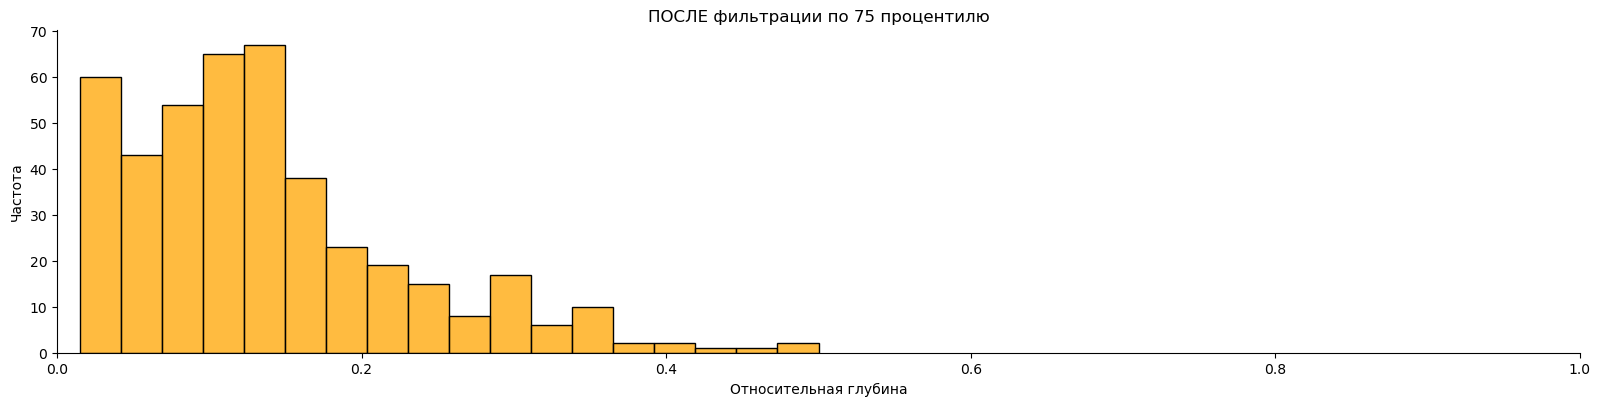

In [325]:
# ДО
sns.displot(data=df_TCN, x="Относительная глубина дефекта, %", color='gray', height=4, aspect=4)
plt.title('ДО фильтрации по 75 процентилю')
plt.xlabel('Относительная глубина')
plt.ylabel('Частота')
# Установите масштаб осей для графика ДО
plt.xlim([0, 1])  # Замените минимальное и максимальное значение

# ПОСЛЕ
sns.displot(data=df_TCN_75, x="Относительная глубина дефекта, %", color='orange', height=4, aspect=4)
plt.title('ПОСЛЕ фильтрации по 75 процентилю')
plt.xlabel('Относительная глубина')
plt.ylabel('Частота')
# Установите масштаб осей для графика ПОСЛЕ
plt.xlim([0, 1])  # Замените минимальное и максимальное значение

In [326]:
df_TCN_75.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433 entries, 0 to 456
Data columns (total 61 columns):
 #   Column                                                                              Non-Null Count  Dtype         
---  ------                                                                              --------------  -----         
 0   п/п                                                                                 433 non-null    int64         
 1   п/п тройника                                                                        433 non-null    int64         
 2   ЛПУМГ                                                                               433 non-null    object        
 3   КС                                                                                  433 non-null    object        
 4   МГ                                                                                  433 non-null    object        
 5   км/КЦ                                             

### Перечень исходных данных в соответствиий с ЗП и НП переменными

In [327]:
df_TCN_75 = df_TCN_75[[
                       'п/п тройника',
                       'DN обечайки, мм',
                       'DN ответвления, мм',
                       'Завод изготовитель',
                       'Вид дефекта',
                       'Расположение дефекта',
                       'Тип накладки',
                       'Грубая_I',
                       'Тип_по_DN',
                       'Срок эксплуатации троника',
                       'Расположение дефекта по DN',
                       'DN_для расчета длины дефекта',
                       'Начало',
                       'dt',
                       'Длина, мм',
                       'Глубина, мм',
                       'Относительная глубина дефекта, %'          
                     ]]

Переименуем столбцы для удобства

In [328]:
df_TCN_75 = df_TCN_75.rename(columns={
                                      'Грубая_I': 'Расположение_тройника',
                                      'DN обечайки, мм': 'DN_обечайки',
                                      'DN ответвления, мм': 'DN_ответвления',
                                      'dt': 'Длина, ч'
                                     })

In [329]:
 df_TCN_75.columns = df_TCN_75.columns\
                              .str.lower()\
                              .str.replace(' ', '_')\
                              .str.replace(',', '')\
                              .str.replace('п/п', 'N')

In [330]:
df_TCN_75[ 'относительная_глубина_дефекта_%' ] = round(df_TCN_75[ 'относительная_глубина_дефекта_%' ].mul(100), 2)

In [331]:
df_TCN_75.head()

,N_тройника,dn_обечайки,dn_ответвления,завод_изготовитель,вид_дефекта,расположение_дефекта,тип_накладки,расположение_тройника,тип_по_dn,срок_эксплуатации_троника,расположение_дефекта_по_dn,dn_для_расчета_длины_дефекта,начало,длина_ч,длина_мм,глубина_мм,относительная_глубина_дефекта_%
0,194,1400,1400,ВПО Сибгазификация,Трещиноподобный дефект,Сварное соединение накладка магистрали-магистраль,Накладка магистрали-ответвления,ПУ,Равнопроходной,37,Обечайка,1400,3.0,0.068209,25.0,3.0,11.54
1,196,700,500,ВПО Сибгазификация,Трещиноподобный дефект,Сварное соединение накладка ответвления-ответв...,Накладка ответвления,ГПА,Неравнопроходной,37,Ответвление,500,11.5,0.190986,25.0,2.0,13.99
2,196,700,500,ВПО Сибгазификация,Зона трещин,Сварное соединение накладка магистрали-магистраль,Накладка ответвления,ГПА,Неравнопроходной,37,Обечайка,700,2.9,2.182696,400.0,12.0,46.15
3,202,700,500,ВПО Сибгазификация,Трещиноподобный дефект,Сварное соединение накладка ответвления-ответв...,Накладка ответвления,ГПА,Неравнопроходной,37,Ответвление,500,11.0,0.458366,60.0,1.0,6.99
4,212,1000,1000,ВПО Сибгазификация,Трещиноподобный дефект,Сварное соединение накладка магистрали-магистраль,Накладка магистрали,Коллектор высокого давления,Равнопроходной,36,Обечайка,1000,12.2,0.038197,10.0,4.0,16.67


Количество тройников

In [332]:
df_TCN_75.N_тройника.nunique()

132

Количество дефектов

In [333]:
df_TCN_75.N_тройника.size

433

Количество тройников по типоразмеру

In [334]:
df_TCN_75.groupby(['dn_обечайки', 'dn_ответвления'], as_index=False)\
         .agg({'N_тройника': 'nunique'})\
         .rename(columns={'N_тройника': 'количество_тройников'})\
         .sort_values('количество_тройников', ascending=False)

,dn_обечайки,dn_ответвления,количество_тройников
2,700,500,17
6,1000,500,16
8,1000,1000,16
7,1000,700,15
1,700,400,11
5,1000,400,9
15,1400,1400,9
11,1400,300,8
14,1400,1000,7
4,1000,300,6


Количество дефектов по типоразмеру

In [335]:
df_TCN_75.groupby(['dn_обечайки', 'dn_ответвления'], as_index=False)\
         .agg({'N_тройника': 'count'})\
         .rename(columns={'N_тройника': 'количество_дефектов'})\
         .sort_values('количество_дефектов', ascending=False)

,dn_обечайки,dn_ответвления,количество_дефектов
6,1000,500,70
7,1000,700,55
8,1000,1000,50
2,700,500,37
11,1400,300,32
12,1400,500,28
1,700,400,27
4,1000,300,24
15,1400,1400,24
5,1000,400,23


Деталицация по переменным

**завод_изготовитель**

In [336]:
df_TCN_75.завод_изготовитель.value_counts()

ВПО Сибгазификация                                                                         223
ПО Трубодеталь                                                                              51
Новосинеглазовский комбинат строительных конструкций; ПО Турбодеталь; ПО Сибгазификация     37
Новосинеглазовский комбинат строительных конструкций                                        30
ВПО Союзгазификация                                                                         17
ПО Сибгазификация; ПО Трубодеталь                                                            5
ЦЭММ Нефтепроводмонтаж                                                                       5
ВПО Сюзнефтегазстройконструкция                                                              3
ЦЭММ ГВТПС                                                                                   3
Нефтепроводмонтаж                                                                            1
ПО Сибгазтройдеталь                               

**вид_дефекта**

In [337]:
df_TCN_75.вид_дефекта.value_counts()

Зона трещин                               152
Трещиноподобный дефект                    147
Скопление пор                              48
Зона межваликовых несплавлений             14
Поперечная трещина                         12
Подрез                                      9
Пора                                        9
Коррозия                                    7
Задир                                       7
Несплавление                                7
Зона задиров                                3
Утяжина                                     2
Поверхностная пористость                    2
Зона трещин на продольном шве               2
Зона поперечных трещин                      2
Шлаковое включение                          1
Поры                                        1
Скопление пор, зона трещин                  1
Кратер                                      1
Зона коррозии                               1
Зона продольных трещин                      1
Зона трещиноподобых дефектов      

**расположение_дефекта**

In [338]:
df_TCN_75.расположение_дефекта.value_counts()

Сварное соединение накладка магистрали-ответвление                       150
Сварное соединение накладка магистрали-магистраль                         98
Сварное соединение накладка ответвления-ответвление                       48
Сварное соединение накладка магистрали-накладка ответвления               34
КСС ответвление-труба                                                     23
Сварное соединение накладка магистрали-накладка магистраль                15
ОКШЗ КСС магистраль-труба                                                 14
КСС магистраль-труба                                                      14
Накладка магистрали                                                       10
Продольное сварное соединение магистрали                                   7
Основной металл магистрали                                                 6
Основной металл ответвления                                                5
КСС катушка-труба                                                          4

**тип_накладки**

In [339]:
df_TCN_75.тип_накладки.value_counts()

Накладка ответвления               210
Накладка магистрали                109
Накладка магистрали-ответвления     68
Без накладки                        46
Name: тип_накладки, dtype: int64

**расположение_тройника**

In [340]:
df_TCN_75.расположение_тройника.value_counts()

ГПА                            165
АВОг                            80
Выходной шлейф                  63
Линия транзита газа             45
ПУ                              31
Малое станционное кольцо        21
Входной шлейф                   17
Большое станционное кольцо       5
Коллектор низкого давления       4
Коллектор высокого давления      2
Name: расположение_тройника, dtype: int64

**тип_по_dn**

In [341]:
df_TCN_75.тип_по_dn.value_counts()

Неравнопроходной    336
Равнопроходной       97
Name: тип_по_dn, dtype: int64

**расположение_дефекта_по_dn**

In [342]:
df_TCN_75.расположение_дефекта_по_dn.value_counts()

Обечайка       235
Ответвление    198
Name: расположение_дефекта_по_dn, dtype: int64

**dn_для_расчета_длины_дефекта**

In [343]:
df_TCN_75.dn_для_расчета_длины_дефекта.value_counts()

1000    133
500      95
1400     75
700      68
400      32
300      24
150       4
50        2
Name: dn_для_расчета_длины_дефекта, dtype: int64

## Анализ зависимостей по трещеноподобным дефектам без учета групповых

In [344]:
df_TCN_75_crack = df_TCN_75[ df_TCN_75['вид_дефекта'].str.contains('трещин', case=False) & \
                             ~df_TCN_75['вид_дефекта'].str.contains('зон', case=False) ]

In [345]:
df_TCN_75_crack.head()

,N_тройника,dn_обечайки,dn_ответвления,завод_изготовитель,вид_дефекта,расположение_дефекта,тип_накладки,расположение_тройника,тип_по_dn,срок_эксплуатации_троника,расположение_дефекта_по_dn,dn_для_расчета_длины_дефекта,начало,длина_ч,длина_мм,глубина_мм,относительная_глубина_дефекта_%
0,194,1400,1400,ВПО Сибгазификация,Трещиноподобный дефект,Сварное соединение накладка магистрали-магистраль,Накладка магистрали-ответвления,ПУ,Равнопроходной,37,Обечайка,1400,3.0,0.068209,25.0,3.0,11.54
1,196,700,500,ВПО Сибгазификация,Трещиноподобный дефект,Сварное соединение накладка ответвления-ответв...,Накладка ответвления,ГПА,Неравнопроходной,37,Ответвление,500,11.5,0.190986,25.0,2.0,13.99
3,202,700,500,ВПО Сибгазификация,Трещиноподобный дефект,Сварное соединение накладка ответвления-ответв...,Накладка ответвления,ГПА,Неравнопроходной,37,Ответвление,500,11.0,0.458366,60.0,1.0,6.99
4,212,1000,1000,ВПО Сибгазификация,Трещиноподобный дефект,Сварное соединение накладка магистрали-магистраль,Накладка магистрали,Коллектор высокого давления,Равнопроходной,36,Обечайка,1000,12.2,0.038197,10.0,4.0,16.67
5,212,1000,1000,ВПО Сибгазификация,Трещиноподобный дефект,Сварное соединение накладка ответвления-ответв...,Накладка ответвления,Коллектор высокого давления,Равнопроходной,36,Обечайка,1000,11.2,0.038197,10.0,4.0,16.67


Количество тройников

In [346]:
df_TCN_75_crack.N_тройника.nunique()

49

Количество дефектов

In [347]:
df_TCN_75_crack.N_тройника.size

161

Количество тройников по типоразмеру

In [348]:
df_TCN_75_crack.groupby(['dn_обечайки', 'dn_ответвления'], as_index=False)\
               .agg({'N_тройника': 'nunique'})\
               .rename(columns={'N_тройника': 'количество_тройников'})\
               .sort_values('количество_тройников', ascending=False)

,dn_обечайки,dn_ответвления,количество_тройников
5,1000,500,10
2,700,500,7
6,1000,700,6
8,1400,300,4
12,1400,1400,4
4,1000,300,3
7,1000,1000,3
10,1400,700,3
11,1400,1000,3
1,700,400,2


Количество дефектов по типоразмеру

In [349]:
df_TCN_75_crack.groupby(['dn_обечайки', 'dn_ответвления'], as_index=False)\
               .agg({'N_тройника': 'count'})\
               .rename(columns={'N_тройника': 'количество_дефектов'})\
               .sort_values('количество_дефектов', ascending=False)

,dn_обечайки,dn_ответвления,количество_дефектов
5,1000,500,54
8,1400,300,18
4,1000,300,16
6,1000,700,13
1,700,400,12
2,700,500,10
9,1400,500,9
12,1400,1400,7
7,1000,1000,6
3,700,700,5


Деталицация по переменным

**завод_изготовитель**

In [350]:
df_TCN_75_crack.завод_изготовитель.value_counts()

ВПО Сибгазификация                                                                         106
ПО Трубодеталь                                                                              31
Новосинеглазовский комбинат строительных конструкций; ПО Турбодеталь; ПО Сибгазификация     14
ПО Сибгазификация; ПО Трубодеталь                                                            3
Новосинеглазовский комбинат строительных конструкций                                         2
ВПО Сюзнефтегазстройконструкция                                                              2
Нефтепроводмонтаж                                                                            1
Name: завод_изготовитель, dtype: int64

**вид_дефекта**

In [351]:
df_TCN_75_crack.вид_дефекта.value_counts()

Трещиноподобный дефект                    147
Поперечная трещина                         12
Трещина сварного соединения                 1
Трещина сварного соединения в царапине      1
Name: вид_дефекта, dtype: int64

**расположение_дефекта**

In [352]:
df_TCN_75_crack.расположение_дефекта.value_counts()

Сварное соединение накладка магистрали-ответвление                       60
Сварное соединение накладка магистрали-магистраль                        26
Сварное соединение накладка ответвления-ответвление                      25
ОКШЗ КСС магистраль-труба                                                11
Сварное соединение накладка магистрали-накладка магистраль               10
Сварное соединение накладка магистрали-накладка ответвления               8
КСС ответвление-труба                                                     8
КСС магистраль-труба                                                      4
Продольное сварное соединение магистрали                                  3
КСС катушка-труба                                                         2
ОКШЗ КСС ответвление-труба                                                2
Основной металл ответвления                                               1
Продольное сварное соединение накладка магистрали-накладка магистрали     1
Name: распол

**тип_накладки**

In [353]:
df_TCN_75_crack.тип_накладки.value_counts()

Накладка ответвления               92
Накладка магистрали                44
Без накладки                       14
Накладка магистрали-ответвления    11
Name: тип_накладки, dtype: int64

**расположение_тройника**

In [354]:
df_TCN_75_crack.расположение_тройника.value_counts()

ГПА                            87
Выходной шлейф                 29
Линия транзита газа            22
Малое станционное кольцо        7
ПУ                              5
АВОг                            5
Большое станционное кольцо      3
Коллектор высокого давления     2
Коллектор низкого давления      1
Name: расположение_тройника, dtype: int64

**тип_по_dn**

In [355]:
df_TCN_75_crack.тип_по_dn.value_counts()

Неравнопроходной    142
Равнопроходной       19
Name: тип_по_dn, dtype: int64

**расположение_дефекта_по_dn**

In [356]:
df_TCN_75_crack.расположение_дефекта_по_dn.value_counts()

Ответвление    90
Обечайка       71
Name: расположение_дефекта_по_dn, dtype: int64

**dn_для_расчета_длины_дефекта**

In [357]:
df_TCN_75_crack.dn_для_расчета_длины_дефекта.value_counts()

500     58
1000    39
1400    27
700     14
400     12
300     11
Name: dn_для_расчета_длины_дефекта, dtype: int64

## Выбор метода

Перед проведением тестов проверим распределения переменных, а также удовлетворяются ли параметрические условия. В зависимости от этого выберем правильный метод. 

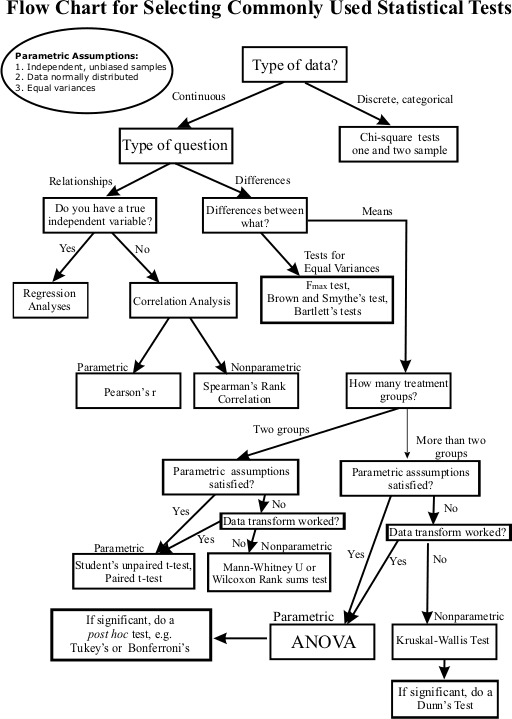

## Распределение срока эксплуатации тройника по типам накладок

Text(32.06790147569445, 0.5, 'Частота')

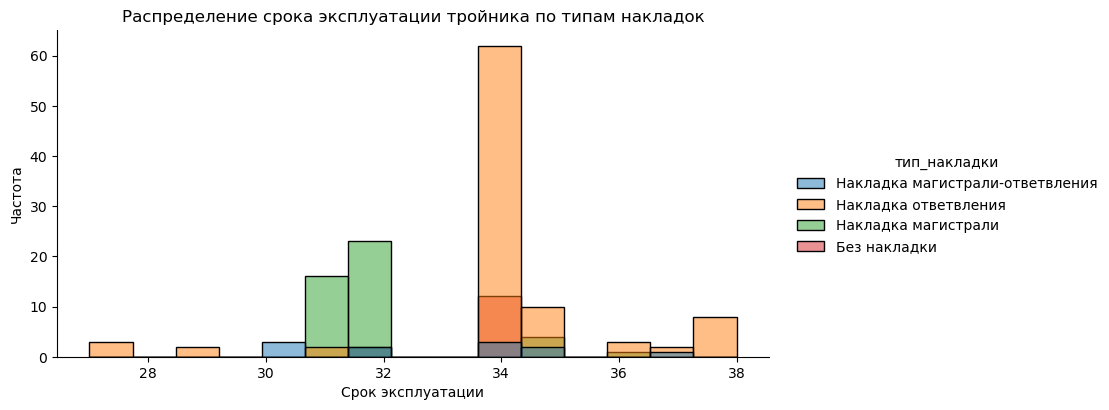

In [358]:
# Срок эксплуатации
sns.displot(data=df_TCN_75_crack, x="срок_эксплуатации_троника",hue='тип_накладки', height=4, aspect=2)
plt.title('Распределение срока эксплуатации тройника по типам накладок')
plt.xlabel('Cрок эксплуатации')
plt.ylabel('Частота')

Text(13.819444444444452, 0.5, 'Частота')

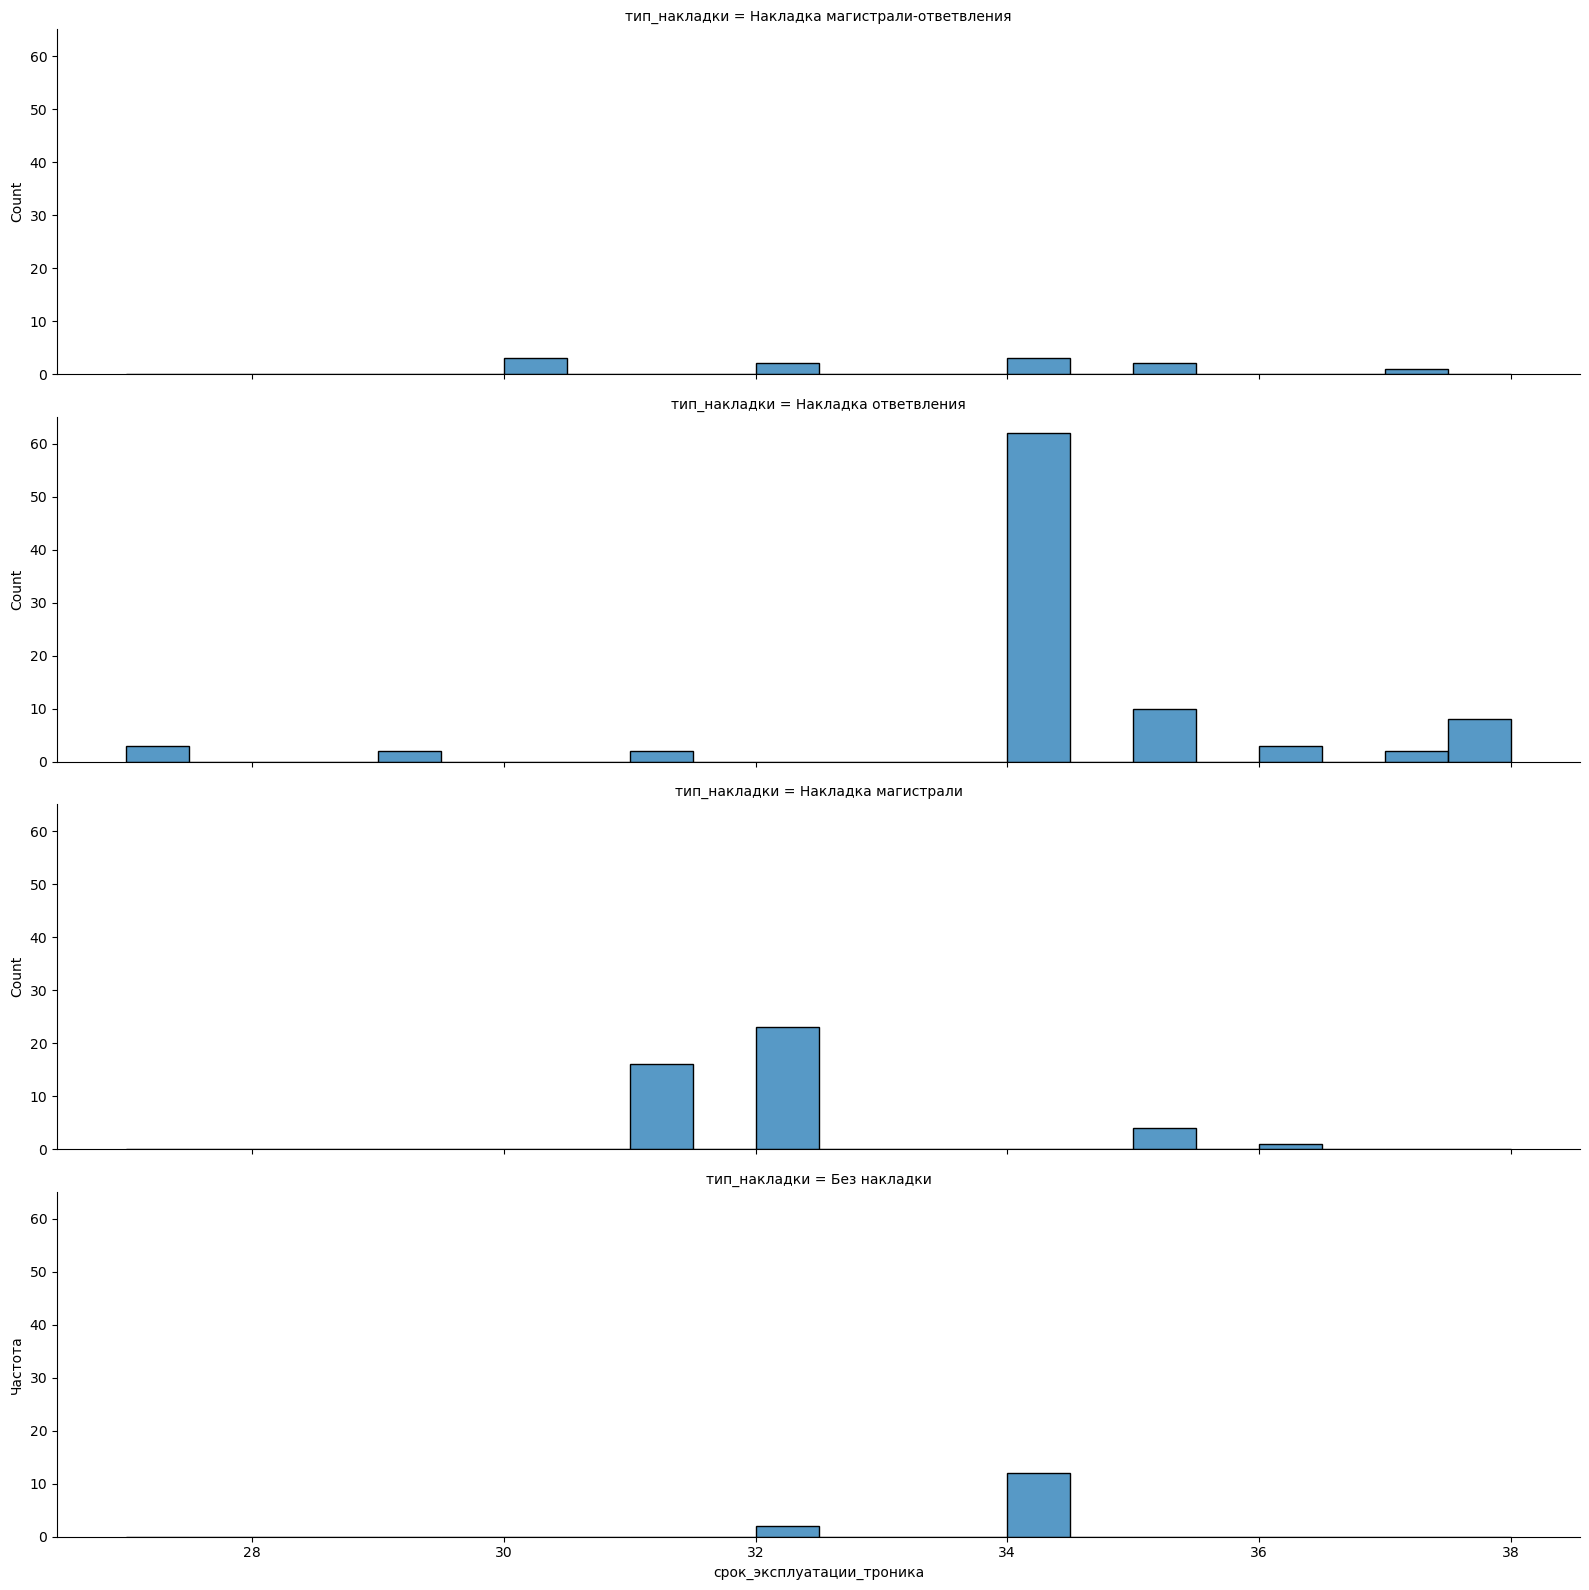

In [359]:
sns.displot(
    df_TCN_75_crack, x="срок_эксплуатации_троника", row="тип_накладки",
    binwidth=0.5, height=4, aspect=4)
plt.ylabel('Частота')

<AxesSubplot:xlabel='срок_эксплуатации_троника', ylabel='тип_накладки'>

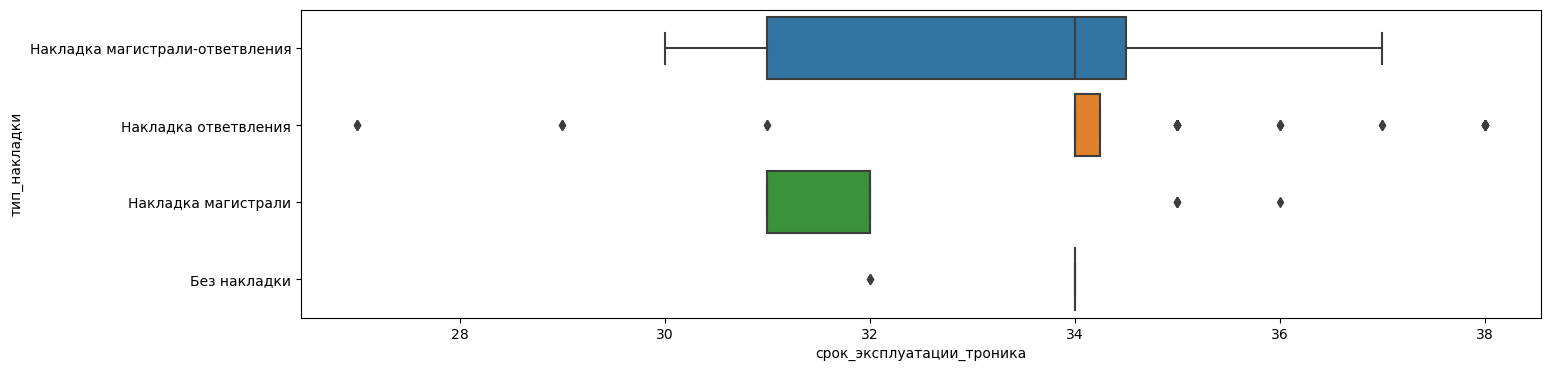

In [360]:
plt.figure(figsize=(16, 4))
sns.boxplot(data=df_TCN_75_crack, x='срок_эксплуатации_троника',y='тип_накладки')

**Q-Q plot**

In [361]:
df_TCN_75_crack.тип_накладки.unique()

array(['Накладка магистрали-ответвления', 'Накладка ответвления',
       'Накладка магистрали', 'Без накладки'], dtype=object)

In [362]:
# Данные для построения Q-Q plot по типам накладок
NMO =df_TCN_75_crack[ df_TCN_75_crack[ 'тип_накладки' ] == 'Накладка магистрали-ответвления' ].срок_эксплуатации_троника
NO =df_TCN_75_crack[ df_TCN_75_crack[ 'тип_накладки' ] == 'Накладка ответвления' ].срок_эксплуатации_троника
NM =df_TCN_75_crack[ df_TCN_75_crack[ 'тип_накладки' ] == 'Накладка магистрали' ].срок_эксплуатации_троника
BN =df_TCN_75_crack[ df_TCN_75_crack[ 'тип_накладки' ] == 'Без накладки' ].срок_эксплуатации_троника

Text(0.5, 1.0, 'Без накладки')

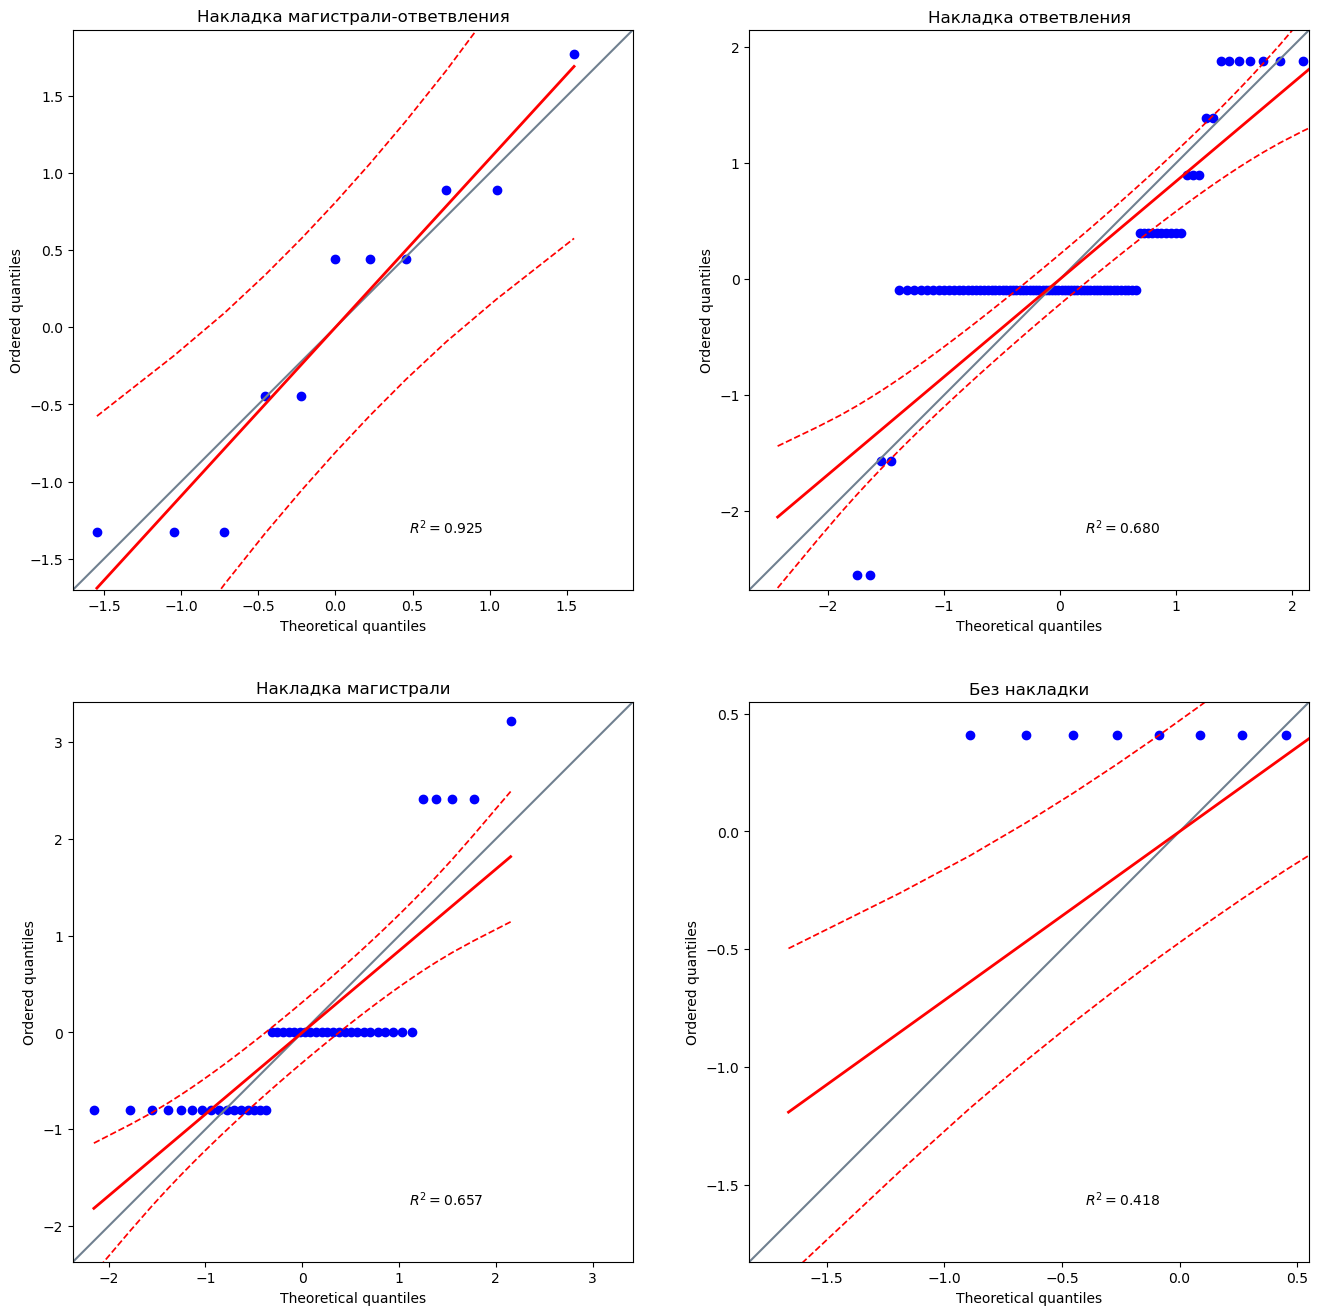

In [363]:
# Создаем фигуру с 2 строкой и 2 столбцами
fig, axes = plt.subplots(2, 2, figsize=(16, 16))  # Измените размер по вашему усмотрению

# Строим квантиль-квантиль графики на каждой из подсеток
pg.qqplot(NMO, dist='norm', ax=axes[0, 0])  # График 1 в первой подсетке
pg.qqplot(NO, dist='norm', ax=axes[0, 1])   # График 2 в первой подсетке
pg.qqplot(NM, dist='norm', ax=axes[1, 0])   # График 3 во второй подсетке
pg.qqplot(BN, dist='norm', ax=axes[1, 1])   # График 4 во второй подсетке

# Настройте заголовки и метки осей
axes[0, 0].set_title('Накладка магистрали-ответвления')
axes[0, 1].set_title('Накладка ответвления')
axes[1, 0].set_title('Накладка магистрали')
axes[1, 1].set_title('Без накладки')

**Тест Шапиро-Уилка**

In [364]:
# method Shapiro-Wilk test(default)
pg.normality(df_TCN_75_crack, dv='срок_эксплуатации_троника', group='тип_накладки')

,W,pval,normal
тип_накладки,,,
Накладка магистрали-ответвления,0.908779,2.358896e-01,True
Накладка ответвления,0.686874,1.041127e-12,False
Накладка магистрали,0.659531,7.653147e-09,False
Без накладки,0.428481,1.712113e-06,False


**Вывод**

По результатам оценки, `срок_эксплуатации_троника` в большей степени относится к распределению не починяющемуся законам нормального. Зафиксировано положительное срабатывание Теста Шапиро-Уилка, которое может быть обусловлено относительно малым количеством наблюдений для категории `Накладка магистрали-ответвления`.

Non-parametric
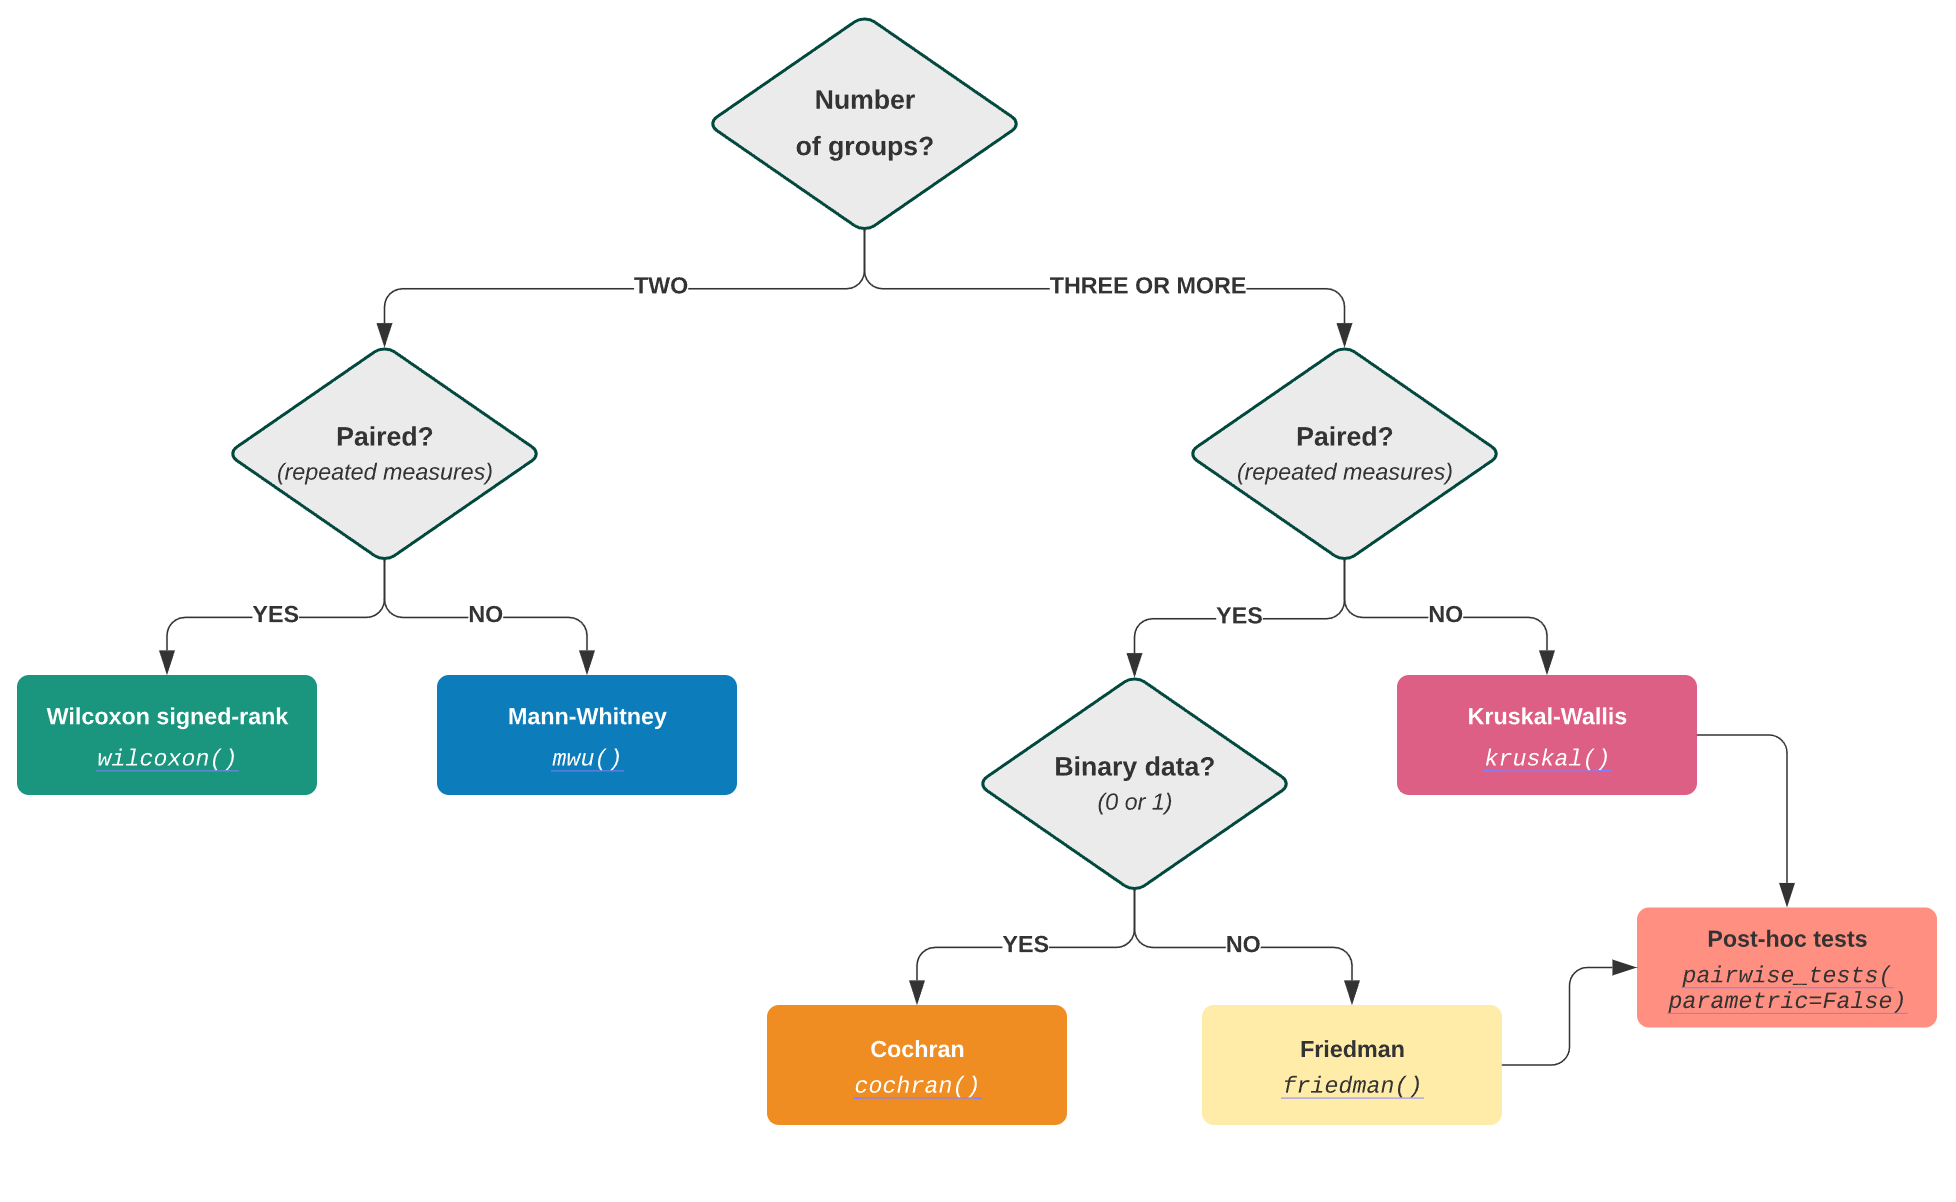

**Тест Крускала-Уоллиса**

In [365]:
pg.kruskal(data=df_TCN_75_crack, dv='срок_эксплуатации_троника', between='тип_накладки')

,Source,ddof1,H,p-unc
Kruskal,тип_накладки,3,49.405141,1.069483e-10


**Post-hoc tests**

In [366]:
pg.pairwise_tests(data=df_TCN_75_crack, dv='срок_эксплуатации_троника', between='тип_накладки',parametric=False).round(3)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges
0,тип_накладки,Без накладки,Накладка магистрали,False,False,523.0,two-sided,0.000,1.463
1,тип_накладки,Без накладки,Накладка магистрали-ответвления,False,False,86.0,two-sided,0.598,0.418
2,тип_накладки,Без накладки,Накладка ответвления,False,False,470.0,two-sided,0.046,-0.242
3,тип_накладки,Накладка магистрали,Накладка магистрали-ответвления,False,False,186.0,two-sided,0.213,-0.644
4,тип_накладки,Накладка магистрали,Накладка ответвления,False,False,633.5,two-sided,0.000,-1.188
5,тип_накладки,Накладка магистрали-ответвления,Накладка ответвления,False,False,374.0,two-sided,0.104,-0.566


**Вывод**

1) `Contrast` относится к сравнению между разными уровнями или группами.\
2) `A` и `B` представляют собой категории или уровни, которые сравниваются в каждом контрасте.\
3) `Paired` указывает, является ли сравнение связанным (True) или несвязанным (False).\
4) `Parametric` указывает, использовались ли параметрические предположения (True) или нет (False).\
5) `U-val` представляет собой значение U, обычно связанное с тестом Манна-Уитни.\
6) `Alternative` определяет тип альтернативной гипотезы (двусторонняя или односторонняя).\
7) `p-unc` - это уровень значимости, связанный с тестом, оценивающий статистическую значимость результатов.\
8) `Hedges` кажется быть эффектом размера Hedges' g, который количественно оценивает величину наблюдаемой разницы.

Hedges' g - это стандартизированный показатель, используемый для измерения размера эффекта в статистике. Он аналогичен показателю Cohen's d, но с поправкой на искажение из-за небольших выборок. Hedges' g учитывает размер выборки и может быть использован для оценки величины различий между двумя группами.

Знак Hedges' g указывает на направление различия между группами:

1. Положительное значение Hedges' g указывает на то, что первая группа (в данном случае, "А") имеет более высокое среднее значение по сравнению с второй группой ("B").

2. Отрицательное значение Hedges' g означает, что вторая группа ("B") имеет более высокое среднее значение по сравнению с первой группой ("A").

- Hedges' g около 0.2 указывает на малый размер эффекта.
- Hedges' g около 0.5 указывает на средний размер эффекта.
- Hedges' g ближе к 0.8 указывает на большой размер эффекта.

Коэн предложил соблюдать осторожность при использовании этого эмпирического правила. Термины “малый” и “большой” эффекты могут означать разные вещи в разных областях. Например, ”небольшое“ снижение числа самоубийств неоценимо, тогда как "небольшая” потеря веса может оказаться бессмысленной. [What is Hedges’ g?](https://www.statisticshowto.com/hedges-g/)

**Итерпритация результатов:**

1. В первой строке контраст между "Без накладки" и "Накладка магистрали" в категории "тип_накладки". Тест показал значение p-уровня (p-unc = 0.000), что указывает на существенную разницу между этими двумя категориями. Эффект размера Hedges' g составляет 1.463 и является положительным. Это означает, что "Накладка магистрали" в среднем имеет более высокие значения срока эксплуатации по сравнению с "Без накладки" на 1.463 стандартных отклонения. Этот эффект размера является большим.


2. Во второй строке контраст между "Без накладки" и "Накладка магистрали-ответвления." Уровень значимости p составляет 0.598, не является статистически значимым (p > 0.05), что указывает на отсутствие существенной разницы между этими категориями. Эффект размера Hedges' g равен 0.418 и также положителен. Это означает, что, несмотря на отсутствие статистически значимой разницы, "Накладка магистрали-ответвления" в среднем имеет более высокие значения срока эксплуатации по сравнению с "Без накладки" на 0.418 стандартных отклонения. Этот эффект размера является малым.


3. В третьей строке контраст между "Без накладки" и "Накладка ответвления." Уровень значимости p равен 0.046, меньше 0.05, что указывает на существенную разницу. Эффект размера Hedges' g составляет -0.242 и отрицателен. Это означает, что "Накладка ответвления" в среднем имеет более высокое значения срока эксплуатации по сравнению с "Без накладки" на 0.242 стандартных отклонения. Этот эффект размера также является малым, но в противоположном направлении.


4. В следующей строке уровень значимости p составляет 0.000 и эффекты размера Hedges' g  -1.188, что говорит о более высоком среднем значении  "Накладка ответвления" относительно "Накладка магистрали" на 1.188 стандартного отклонения.


5. Последняя строка показывает отсутствие стат. знчимой взаимосвязи "Накладка магистрали-ответвления" и "Накладка ответвления". Разме ээфекта при это составляет -0.566. Т.е. Среднее срока эксплуатации "Накладка ответвления" больше "Накладка магистрали-ответвления" на 0.566 стандартного отлонения ("Накладка магистрали-ответвления").

Для групп, где зафиксированы стат. значимые различия, недостаточно оснований использовать общий средний срок эксплуатации. В данном случае выгоднее подтверждениее H0 об отсутствии стат. значимых различий.

## Распределение начала дефекта в часовой ориентации по типам накладок

Text(32.06790147569445, 0.5, 'Частота')

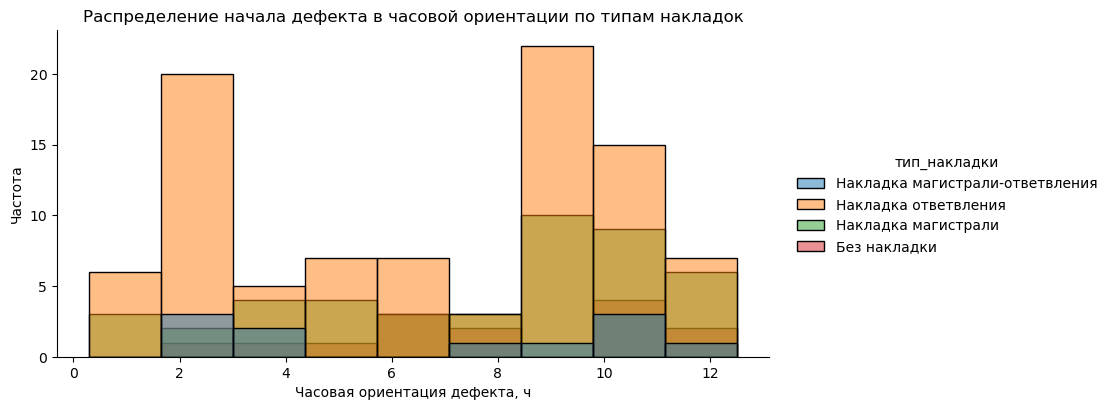

In [367]:
# Часовая ориентация
sns.displot(data=df_TCN_75_crack, x="начало",hue='тип_накладки', height=4, aspect=2)
plt.title('Распределение начала дефекта в часовой ориентации по типам накладок')
plt.xlabel('Часовая ориентация дефекта, ч')
plt.ylabel('Частота')

Text(13.819444444444452, 0.5, 'Частота')

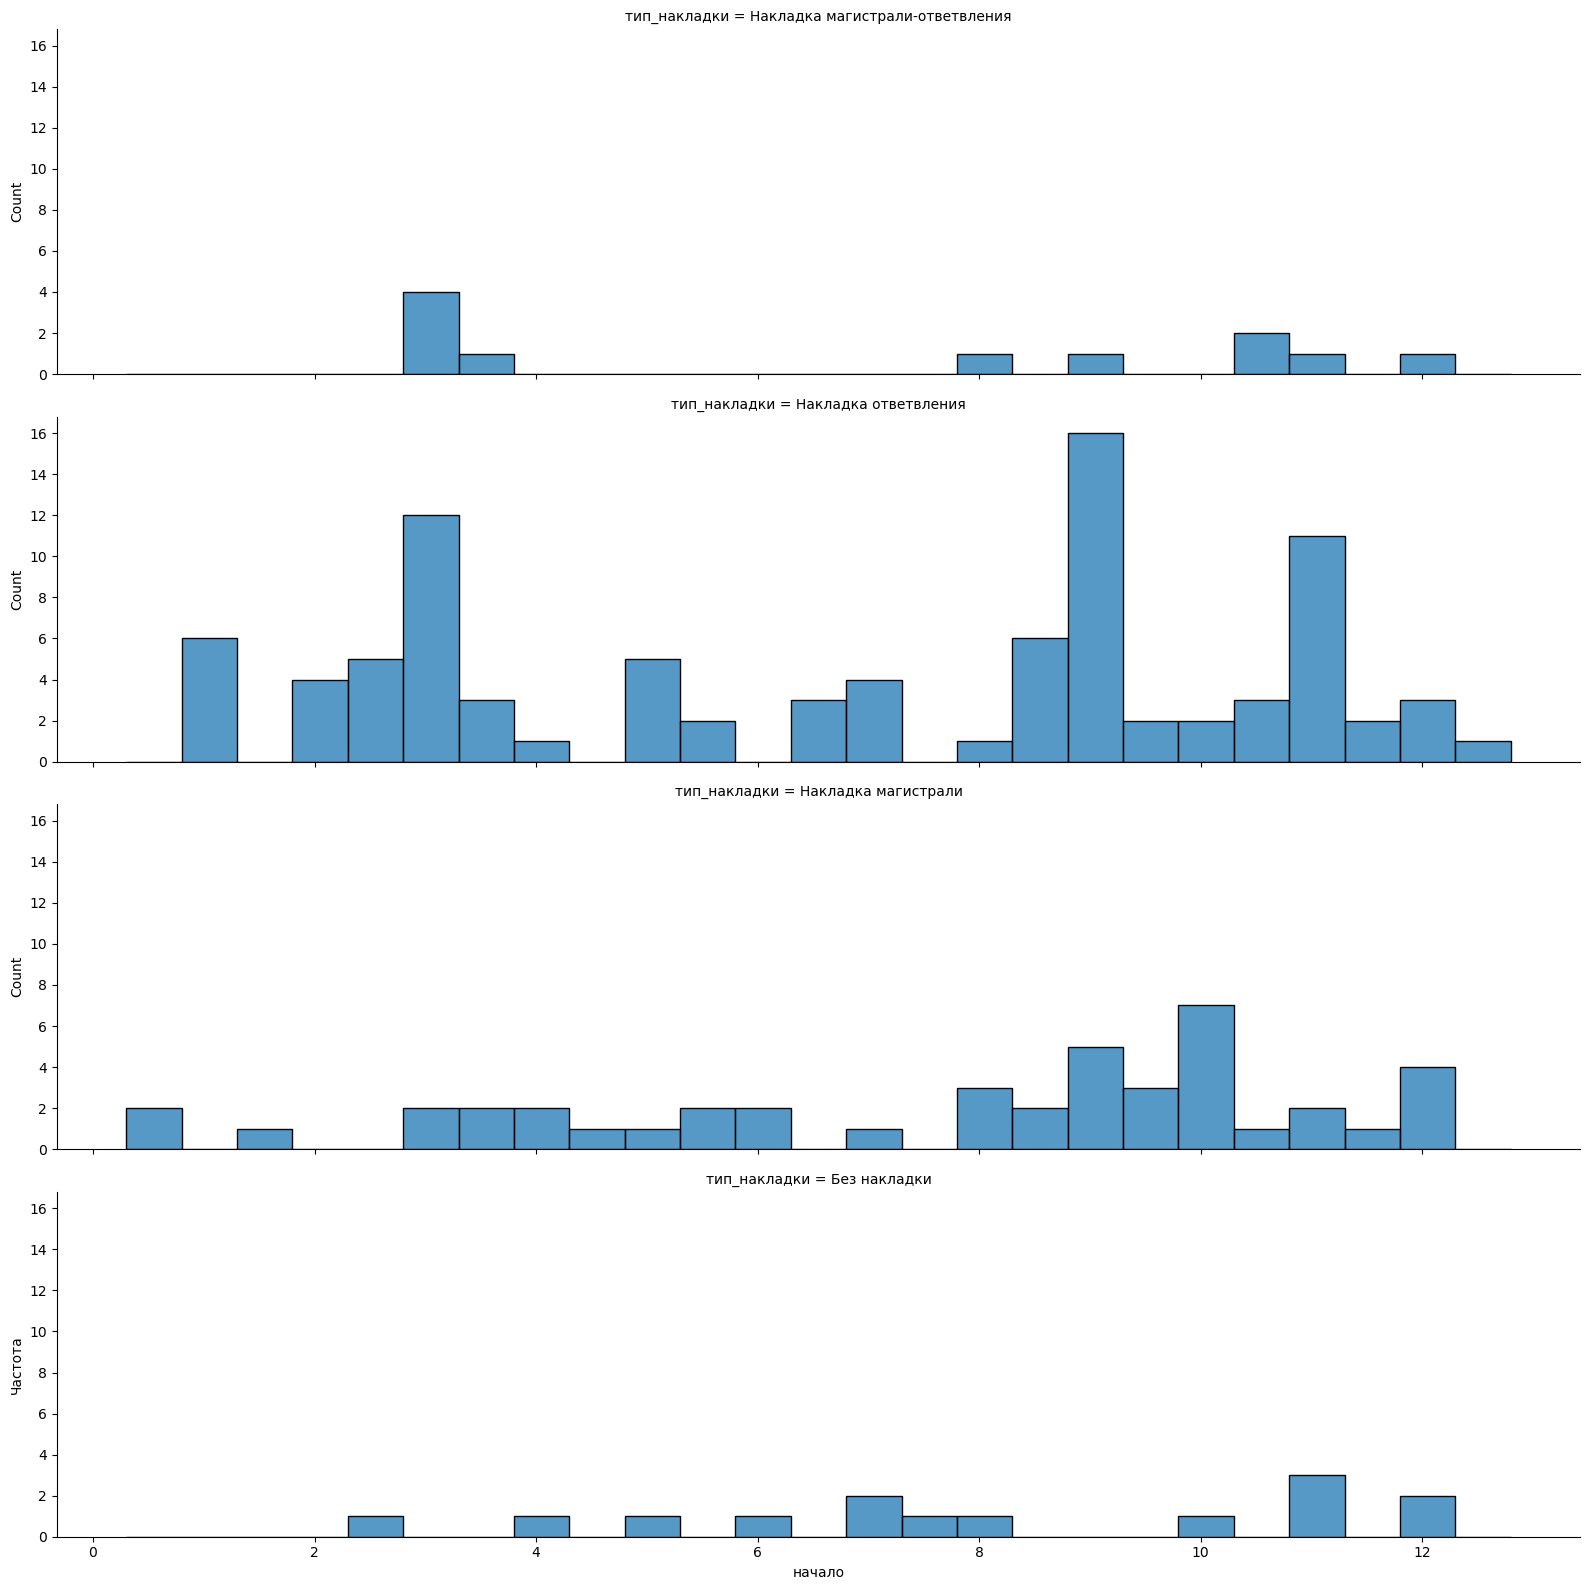

In [368]:
sns.displot(
    df_TCN_75_crack, x="начало", row="тип_накладки",
    binwidth=0.5, height=4, aspect=4)
plt.ylabel('Частота')

<AxesSubplot:xlabel='начало', ylabel='тип_накладки'>

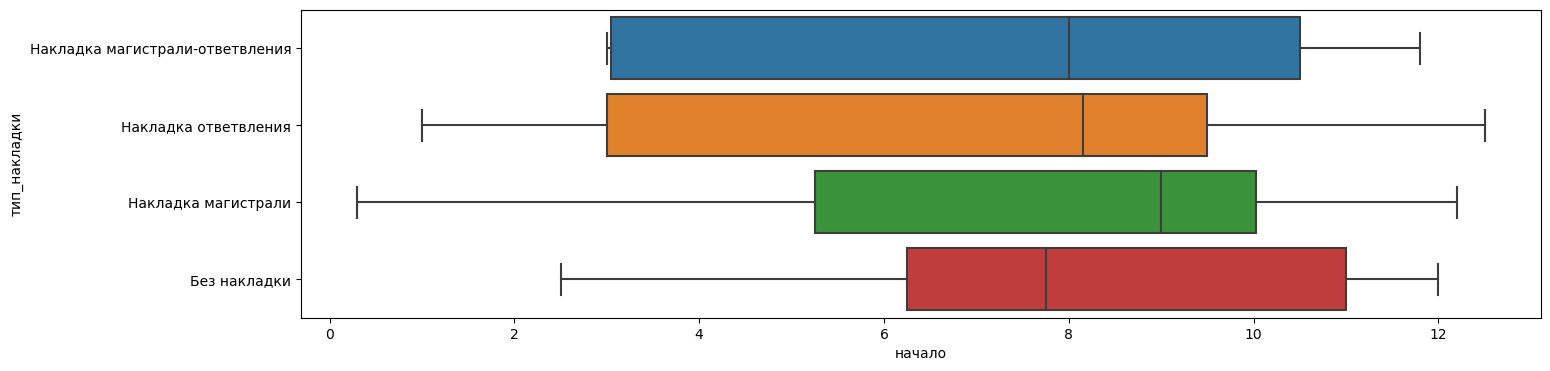

In [369]:
plt.figure(figsize=(16, 4))
sns.boxplot(data=df_TCN_75_crack, x='начало',y='тип_накладки')

**Q-Q plot**

In [370]:
# Данные для построения Q-Q plot по типам накладок
NMO =df_TCN_75_crack[ df_TCN_75_crack[ 'тип_накладки' ] == 'Накладка магистрали-ответвления' ].начало
NO =df_TCN_75_crack[ df_TCN_75_crack[ 'тип_накладки' ] == 'Накладка ответвления' ].начало
NM =df_TCN_75_crack[ df_TCN_75_crack[ 'тип_накладки' ] == 'Накладка магистрали' ].начало
BN =df_TCN_75_crack[ df_TCN_75_crack[ 'тип_накладки' ] == 'Без накладки' ].начало

Text(0.5, 1.0, 'Без накладки')

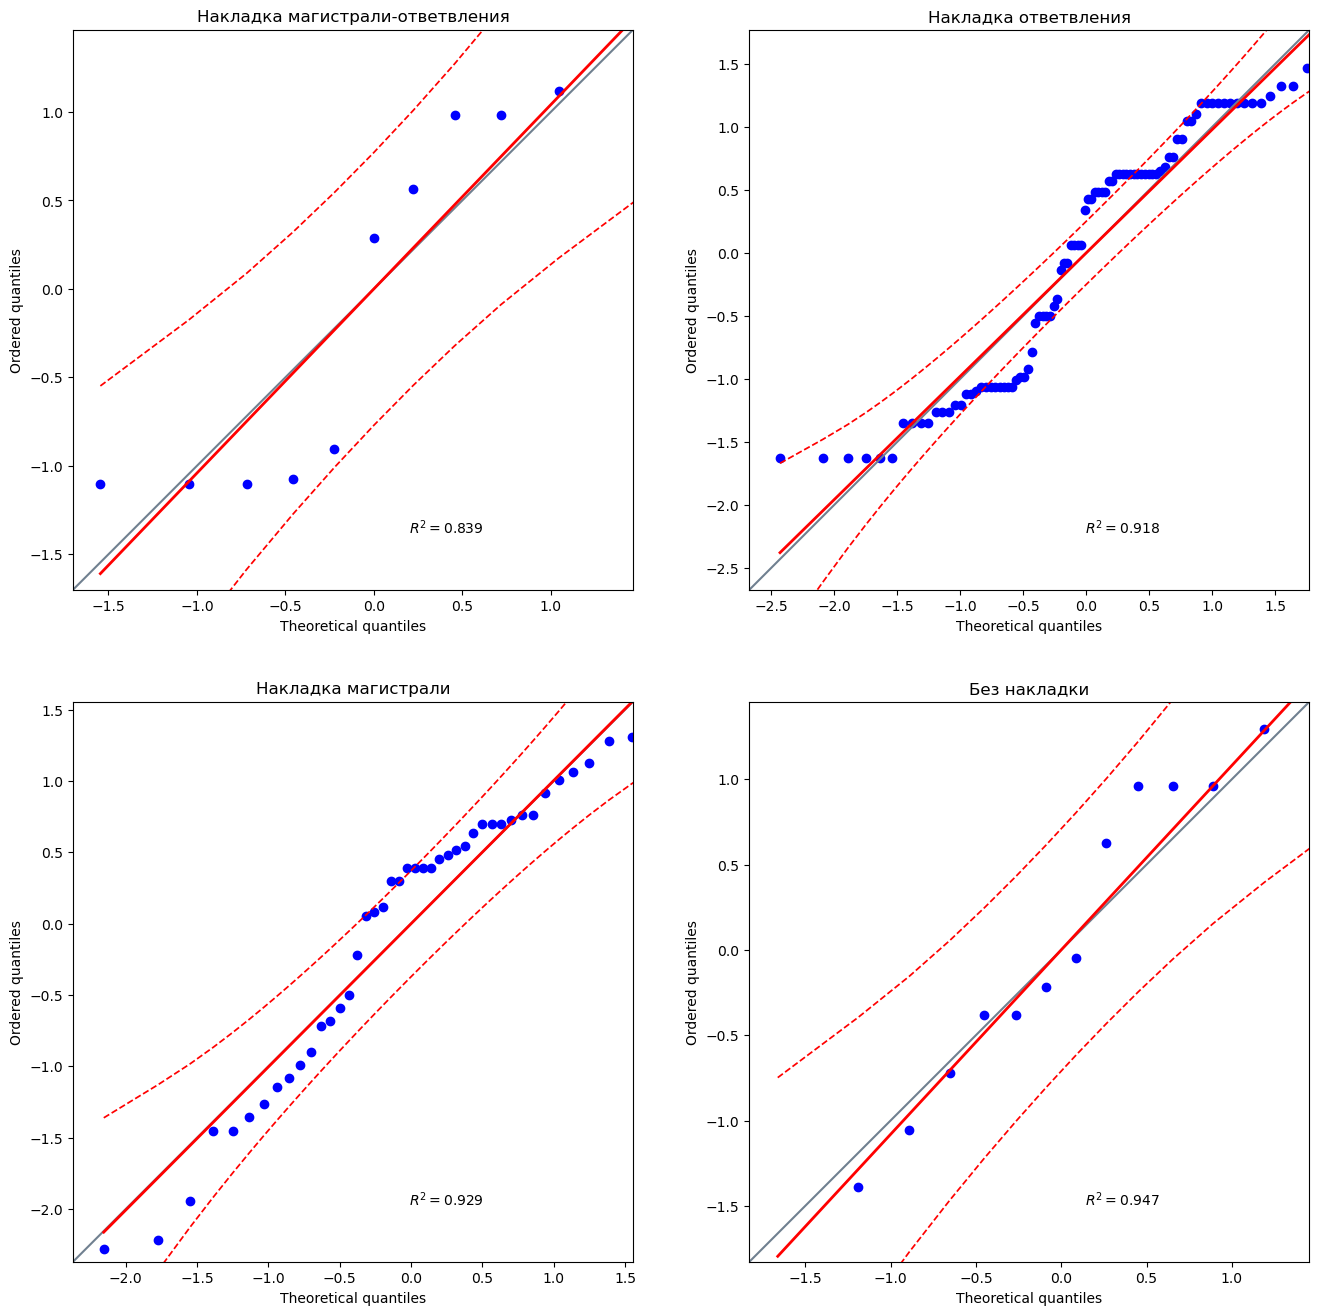

In [371]:
# Создаем фигуру с 2 строкой и 2 столбцами
fig, axes = plt.subplots(2, 2, figsize=(16, 16))  # Измените размер по вашему усмотрению

# Строим квантиль-квантиль графики на каждой из подсеток
pg.qqplot(NMO, dist='norm', ax=axes[0, 0])  # График 1 в первой подсетке
pg.qqplot(NO, dist='norm', ax=axes[0, 1])   # График 2 в первой подсетке
pg.qqplot(NM, dist='norm', ax=axes[1, 0])   # График 3 во второй подсетке
pg.qqplot(BN, dist='norm', ax=axes[1, 1])   # График 4 во второй подсетке

# Настройте заголовки и метки осей
axes[0, 0].set_title('Накладка магистрали-ответвления')
axes[0, 1].set_title('Накладка ответвления')
axes[1, 0].set_title('Накладка магистрали')
axes[1, 1].set_title('Без накладки')

**Тест Шапиро-Уилка**

In [372]:
# method Shapiro-Wilk test(default)
pg.normality(df_TCN_75_crack, dv='начало', group='тип_накладки')

,W,pval,normal
тип_накладки,,,
Накладка магистрали-ответвления,0.803541,0.010473,False
Накладка ответвления,0.907542,0.000007,False
Накладка магистрали,0.919830,0.004699,False
Без накладки,0.929679,0.301999,True


**Вывод**

По результатам оценки, `начала расположения дефекта` в большей степени относится к распределению не починяющемуся законам нормального. Зафиксировано положительное срабатывание Теста Шапиро-Уилка, которое может быть обусловлено относительно малым количеством наблюдений для категории `Без накладки`.

Non-parametric
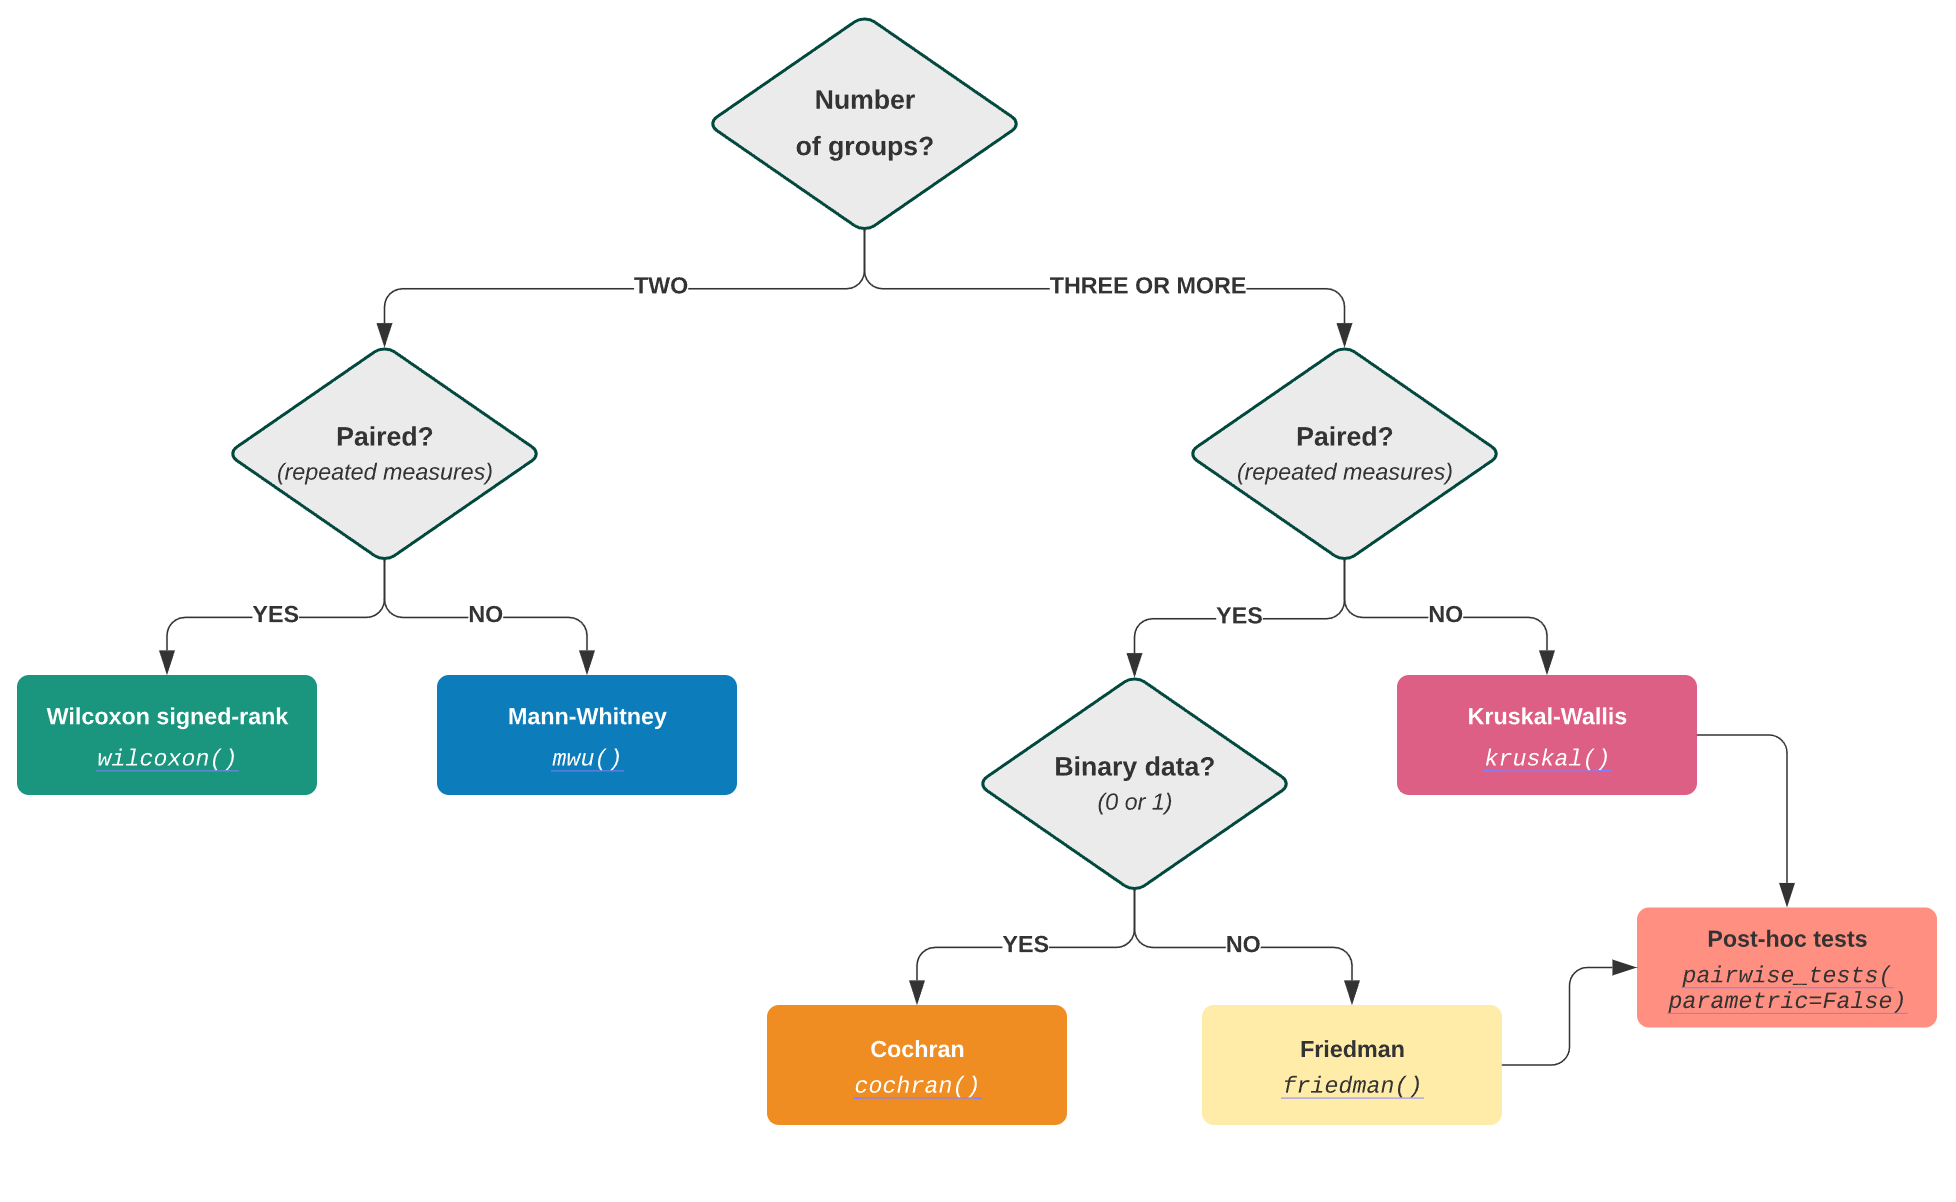

**Тест Крускала-Уоллиса**

In [373]:
pg.kruskal(data=df_TCN_75_crack, dv='начало', between='тип_накладки')

,Source,ddof1,H,p-unc
Kruskal,тип_накладки,3,3.549897,0.314348


**Post-hoc tests**

In [374]:
pg.pairwise_tests(data=df_TCN_75_crack, dv='начало', between='тип_накладки',parametric=False).round(3)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges
0,тип_накладки,Без накладки,Накладка магистрали,False,False,328.0,two-sided,0.723,0.127
1,тип_накладки,Без накладки,Накладка магистрали-ответвления,False,False,93.0,two-sided,0.394,0.335
2,тип_накладки,Без накладки,Накладка ответвления,False,False,782.0,two-sided,0.198,0.383
3,тип_накладки,Накладка магистрали,Накладка магистрали-ответвления,False,False,270.0,two-sided,0.562,0.221
4,тип_накладки,Накладка магистрали,Накладка ответвления,False,False,2360.5,two-sided,0.118,0.267
5,тип_накладки,Накладка магистрали-ответвления,Накладка ответвления,False,False,541.5,two-sided,0.708,0.048


**Вывод**

Сравнение по всем кобинациям, показало отсутствие стат. значимого результа. Другими словами наша выборка не позваляет зафиксировать различия между группами и утверждать, что часовая ориентациия зависти от типа накладки тройникового соединения. Верно H0 об отсутствии стат. значимых различиях между группами по типам накладок-часовой ориентации начала дефекта. Т.е. дефект часта встречающийся, например на 8 часов, так же будет часто встречаться на тройниках с другим типом накладок. Однка в данном сравнении не учитывается множетсва других эксплуатационных факторов.

## Распределение длины дефекта по типам накладок

Text(32.06790147569445, 0.5, 'Частота')

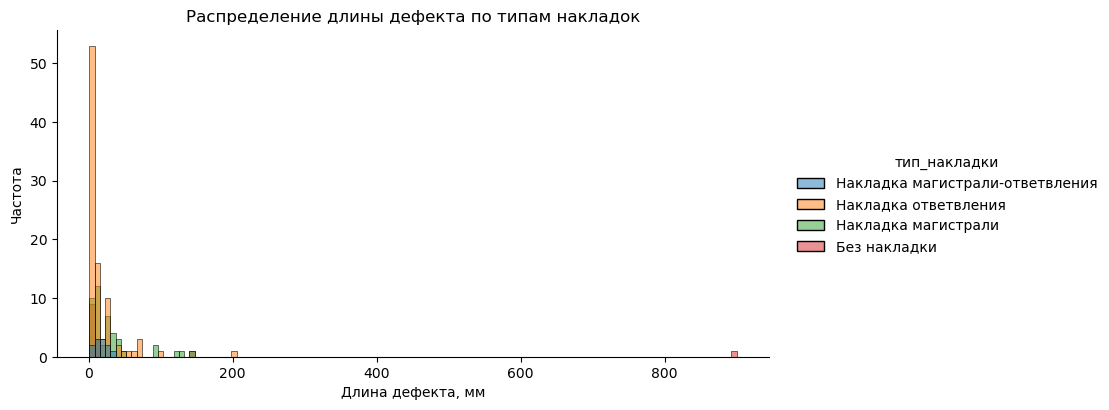

In [375]:
# Часовая ориентация
sns.displot(data=df_TCN_75_crack, x="длина_мм",hue='тип_накладки', height=4, aspect=2)
plt.title('Распределение длины дефекта по типам накладок')
plt.xlabel('Длина дефекта, мм')
plt.ylabel('Частота')

Text(13.819444444444452, 0.5, 'Частота')

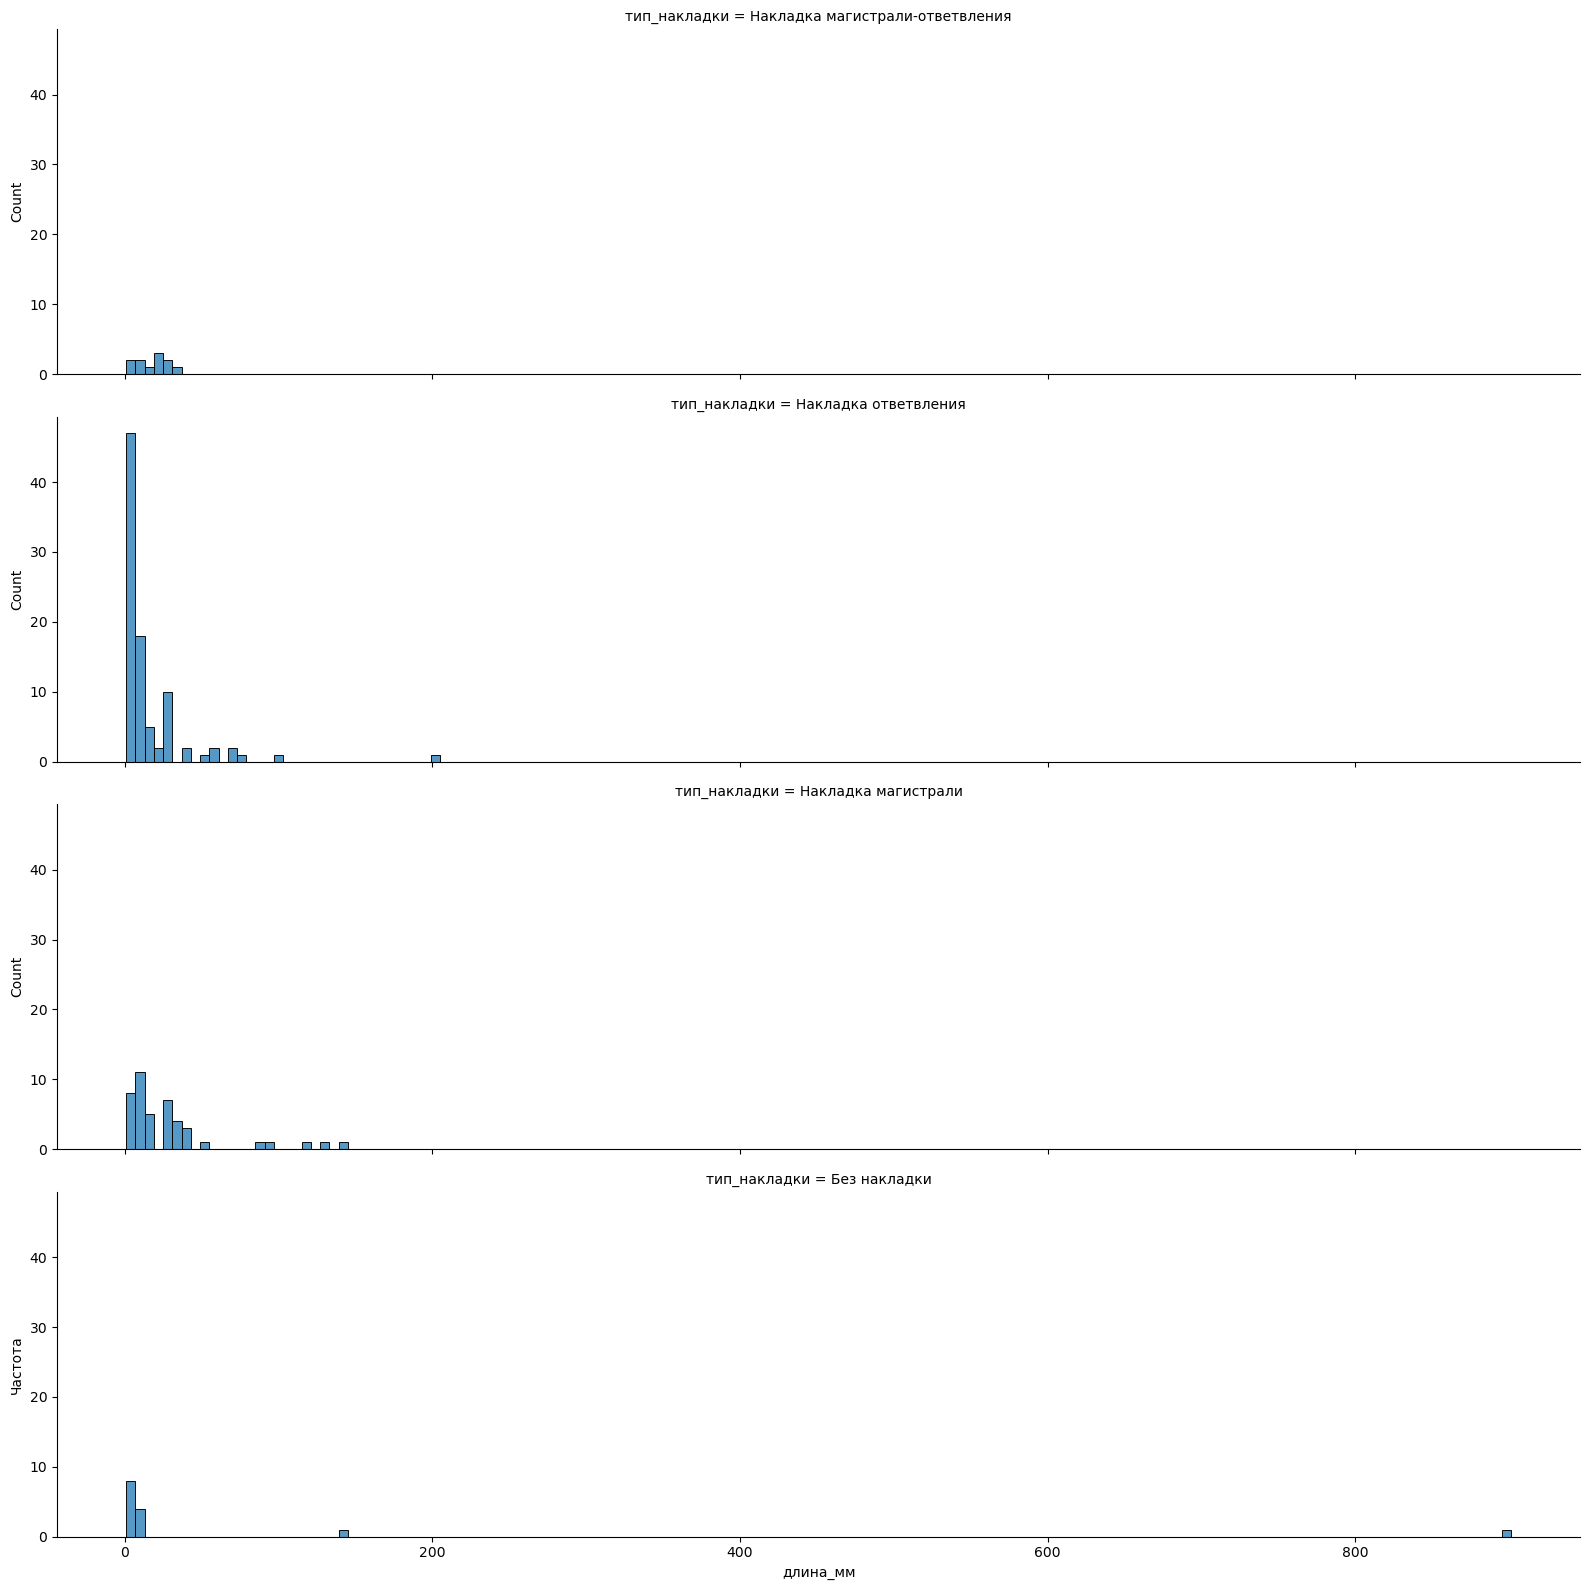

In [376]:
sns.displot(
    df_TCN_75_crack, x="длина_мм", row="тип_накладки",
    binwidth=6, height=4, aspect=4)
plt.ylabel('Частота')

<AxesSubplot:xlabel='длина_мм', ylabel='тип_накладки'>

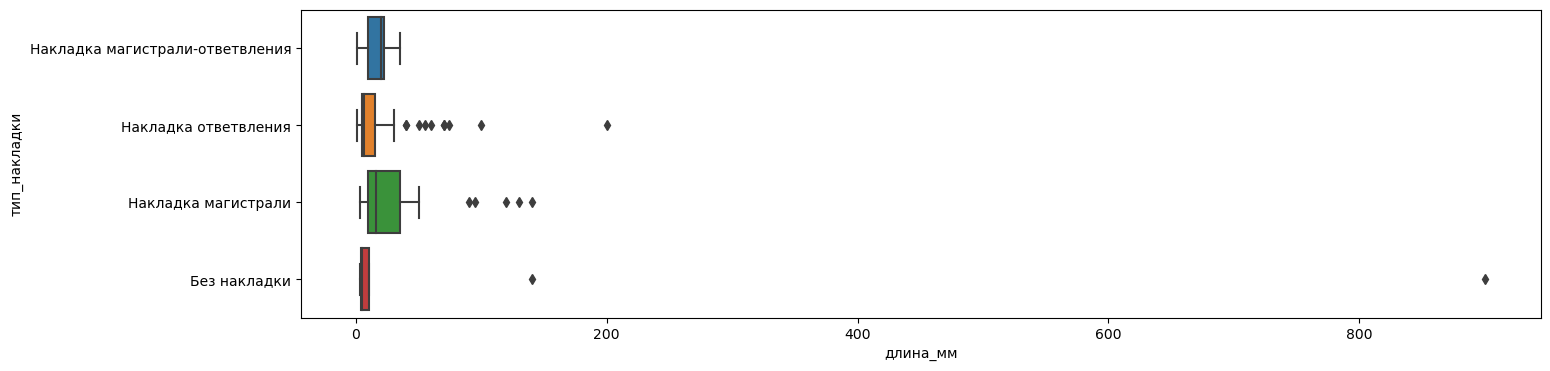

In [377]:
plt.figure(figsize=(16, 4))
sns.boxplot(data=df_TCN_75_crack, x='длина_мм',y='тип_накладки')

**Q-Q plot**

In [378]:
# Данные для построения Q-Q plot по типам накладок
NMO =df_TCN_75_crack[ df_TCN_75_crack[ 'тип_накладки' ] == 'Накладка магистрали-ответвления' ].длина_мм
NO =df_TCN_75_crack[ df_TCN_75_crack[ 'тип_накладки' ] == 'Накладка ответвления' ].длина_мм
NM =df_TCN_75_crack[ df_TCN_75_crack[ 'тип_накладки' ] == 'Накладка магистрали' ].длина_мм
BN =df_TCN_75_crack[ df_TCN_75_crack[ 'тип_накладки' ] == 'Без накладки' ].длина_мм

Text(0.5, 1.0, 'Без накладки')

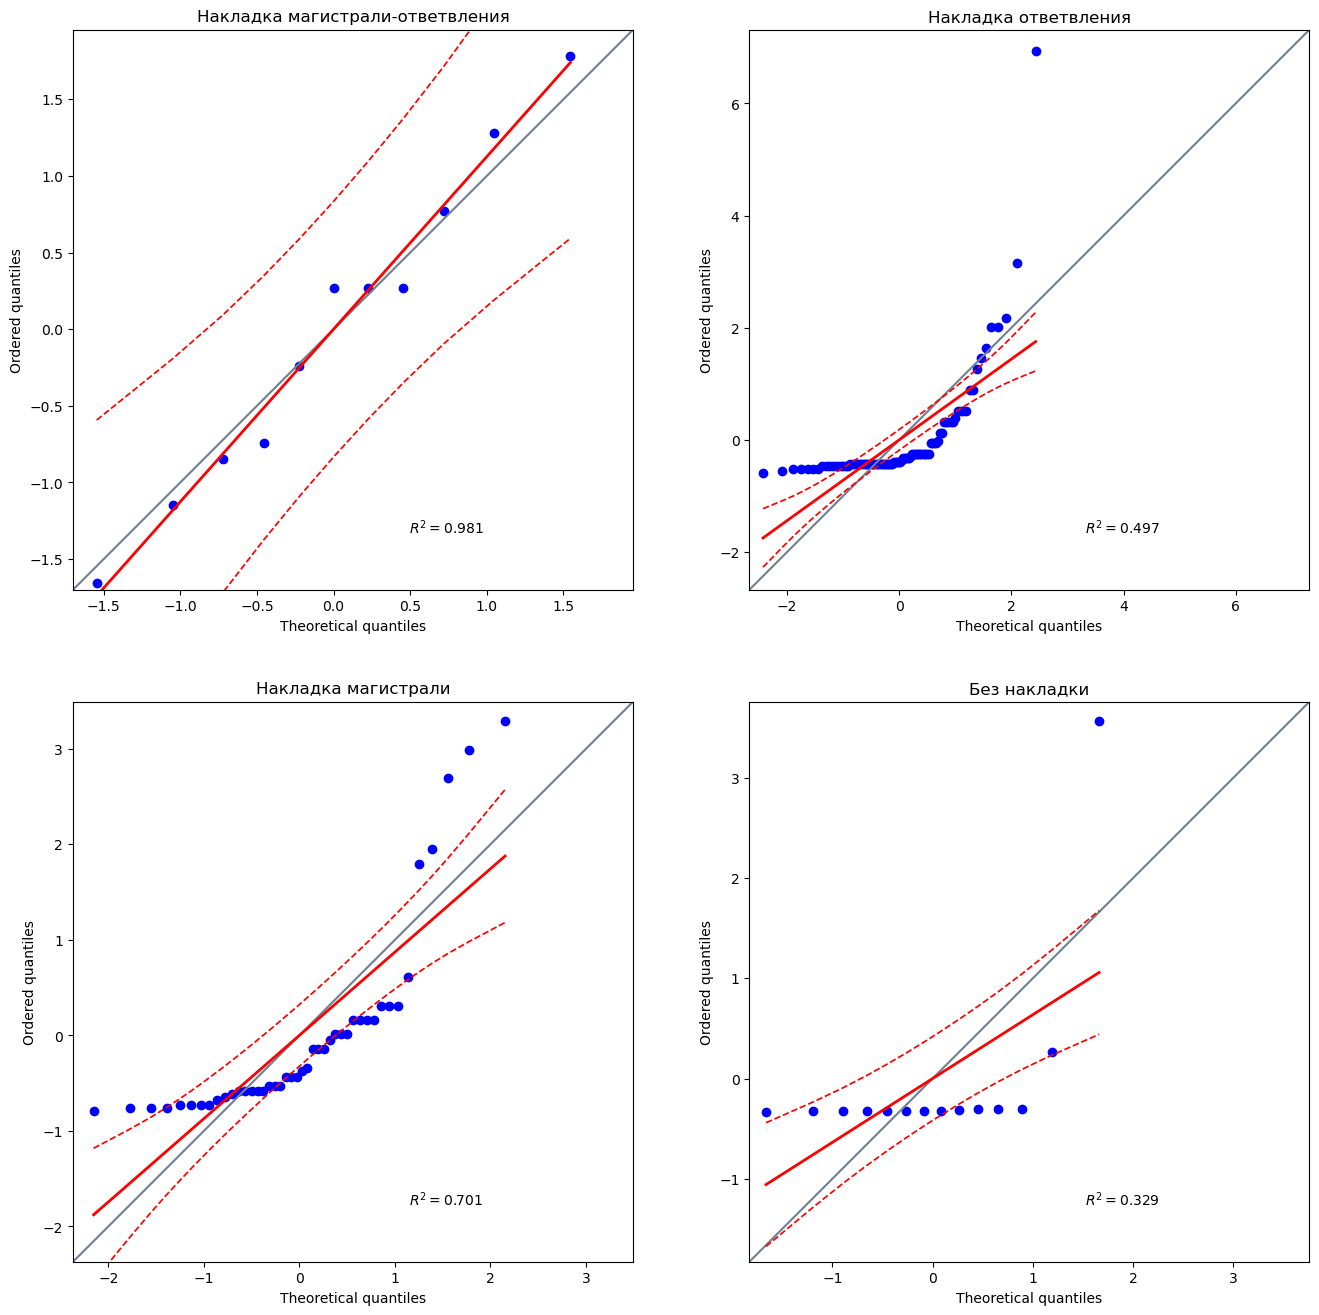

In [379]:
# Создаем фигуру с 2 строкой и 2 столбцами
fig, axes = plt.subplots(2, 2, figsize=(16, 16))  # Измените размер по вашему усмотрению

# Строим квантиль-квантиль графики на каждой из подсеток
pg.qqplot(NMO, dist='norm', ax=axes[0, 0])  # График 1 в первой подсетке
pg.qqplot(NO, dist='norm', ax=axes[0, 1])   # График 2 в первой подсетке
pg.qqplot(NM, dist='norm', ax=axes[1, 0])   # График 3 во второй подсетке
pg.qqplot(BN, dist='norm', ax=axes[1, 1])   # График 4 во второй подсетке

# Настройте заголовки и метки осей
axes[0, 0].set_title('Накладка магистрали-ответвления')
axes[0, 1].set_title('Накладка ответвления')
axes[1, 0].set_title('Накладка магистрали')
axes[1, 1].set_title('Без накладки')

**Тест Шапиро-Уилка**

In [380]:
# method Shapiro-Wilk test(default)
pg.normality(df_TCN_75_crack, dv='длина_мм', group='тип_накладки')

,W,pval,normal
тип_накладки,,,
Накладка магистрали-ответвления,0.974802,9.304683e-01,True
Накладка ответвления,0.512266,5.854972e-16,False
Накладка магистрали,0.703855,4.094996e-08,False
Без накладки,0.363809,6.030601e-07,False


**Вывод**

По результатам оценки, `длина дефекта` в большей степени относится к распределению не починяющемуся законам нормального. Зафиксировано положительное срабатывание Теста Шапиро-Уилка, которое может быть обусловлено относительно малым количеством наблюдений для категории `Накладка магистрали-ответвления`.

Non-parametric
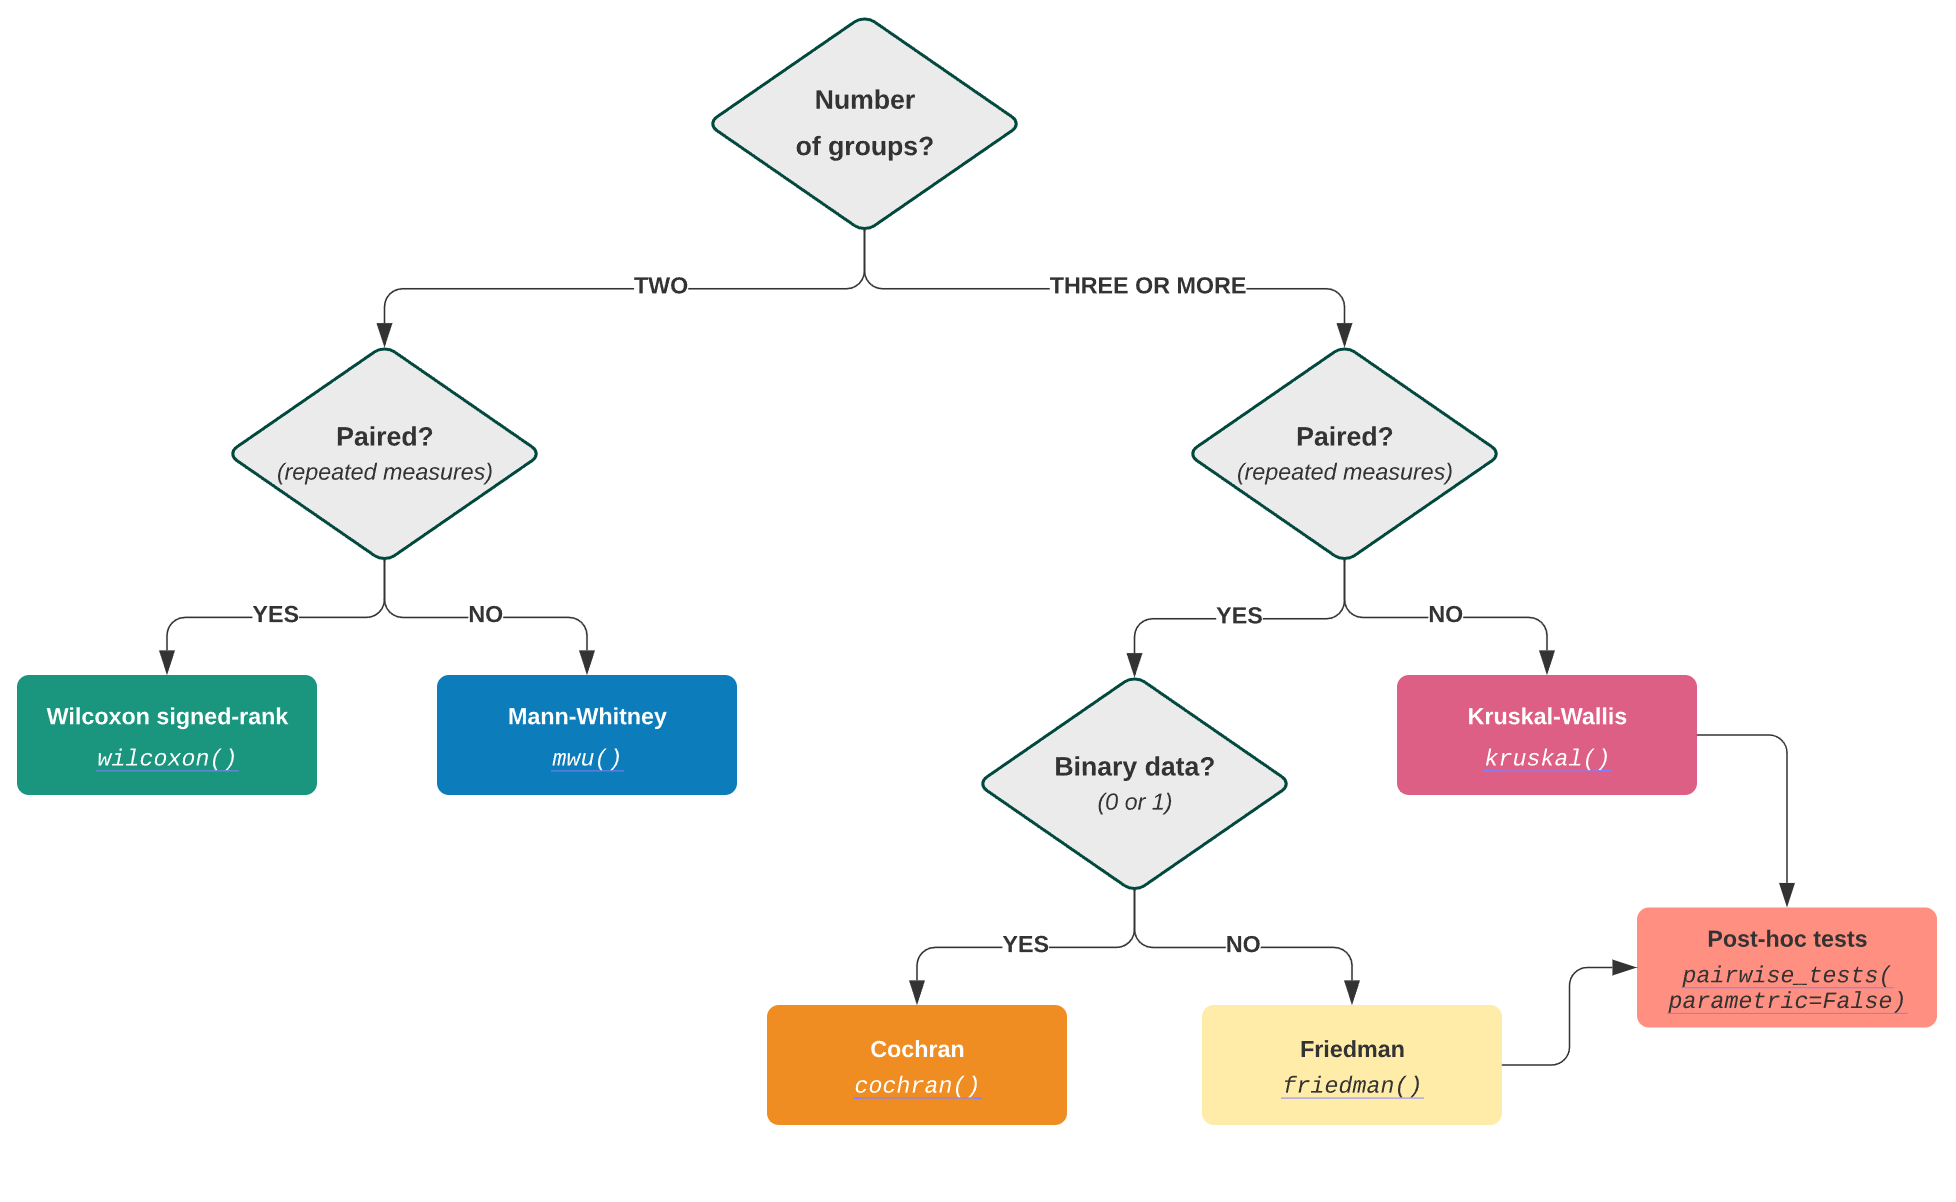

**Тест Крускала-Уоллиса**

In [381]:
pg.kruskal(data=df_TCN_75_crack, dv='длина_мм', between='тип_накладки')

,Source,ddof1,H,p-unc
Kruskal,тип_накладки,3,16.888497,0.000745


**Post-hoc tests**

In [382]:
pg.pairwise_tests(data=df_TCN_75_crack, dv='длина_мм', between='тип_накладки',parametric=False).round(3)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges
0,тип_накладки,Без накладки,Накладка магистрали,False,False,165.0,two-sided,0.009,0.413
1,тип_накладки,Без накладки,Накладка магистрали-ответвления,False,False,42.5,two-sided,0.061,0.334
2,тип_накладки,Без накладки,Накладка ответвления,False,False,550.0,two-sided,0.377,0.708
3,тип_накладки,Накладка магистрали,Накладка магистрали-ответвления,False,False,271.5,two-sided,0.541,0.391
4,тип_накладки,Накладка магистрали,Накладка ответвления,False,False,2799.5,two-sided,0.000,0.444
5,тип_накладки,Накладка магистрали-ответвления,Накладка ответвления,False,False,674.5,two-sided,0.070,0.030


**Вывод**


1) `Contrast` относится к сравнению между разными уровнями или группами.\
2) `A` и `B` представляют собой категории или уровни, которые сравниваются в каждом контрасте.\
3) `Paired` указывает, является ли сравнение связанным (True) или несвязанным (False).\
4) `Parametric` указывает, использовались ли параметрические предположения (True) или нет (False).\
5) `U-val` представляет собой значение U, обычно связанное с тестом Манна-Уитни.\
6) `Alternative` определяет тип альтернативной гипотезы (двусторонняя или односторонняя).\
7) `p-unc` - это уровень значимости, связанный с тестом, оценивающий статистическую значимость результатов.\
8) `Hedges` кажется быть эффектом размера Hedges' g, который количественно оценивает величину наблюдаемой разницы.

Hedges' g - это стандартизированный показатель, используемый для измерения размера эффекта в статистике. Он аналогичен показателю Cohen's d, но с поправкой на искажение из-за небольших выборок. Hedges' g учитывает размер выборки и может быть использован для оценки величины различий между двумя группами.

Знак Hedges' g указывает на направление различия между группами:

1. Положительное значение Hedges' g указывает на то, что первая группа (в данном случае, "А") имеет более высокое среднее значение по сравнению с второй группой ("B").

2. Отрицательное значение Hedges' g означает, что вторая группа ("B") имеет более высокое среднее значение по сравнению с первой группой ("A").

- Hedges' g около 0.2 указывает на малый размер эффекта.
- Hedges' g около 0.5 указывает на средний размер эффекта.
- Hedges' g ближе к 0.8 указывает на большой размер эффекта.

**Итерпритация результатов:**

1. Контраст между "Без накладки" и "Накладка магистрали" показывает статистически значимую разницу (p-unc = 0.009). Эффект размера Hedges' g составляет 0.413 и положителен. Это означает, что средняя длина дефекта в миллиметрах для "Накладка магистрали" ниже, чем для "Без накладки" на 0.413 стандартных отклонения. Эффект размера является средним по величине.


2. Контраст между "Без накладки" и "Накладка магистрали-ответвления" не показывает статистически значимой разницы (p-unc = 0.061). Эффект размера Hedges' g составляет 0.334 и положителен. Это указывает на то, что, несмотря на отсутствие статистически значимой разницы, средняя длина в миллиметрах для "Накладка магистрали-ответвления" ниже, чем для "Без накладки" на 0.334 стандартных отклонения. Эффект размера является малым.


3. Контраст между "Без накладки" и "Накладка ответвления" также не показывает статистически значимых различий(p-unc = 0.377). Эффект размера Hedges' g составляет 0.708 и положителен. Это указывает на то, что средняя длина в миллиметрах для "Накладка ответвления" ниже, чем для "Без накладки" на 0.708 стандартных отклонения. Эффект размера является средним по величине.


4. Контраст между "Накладка магистрали" и "Накладка магистрали-ответвления" не показывает статистически значимой разницы (p-unc = 0.541). Эффект размера Hedges' g составляет 0.391 и положителен. Это указывает на то, что, несмотря на отсутствие статистически значимой разницы, средняя длина в миллиметрах для "Накладка магистрали-ответвления" ниже, чем для "Накладка магистрали" на 0.391 стандартных отклонения. Эффект размера является малым.


5. Контраст между "Накладка магистрали" и "Накладка ответвления" показывает статистически значимую разницу (p-unc = 0.000). Эффект размера Hedges' g составляет 0.444 и положителен. Это означает, что средняя длина в миллиметрах для "Накладка ответвления" ниже, чем для "Накладка магистрали" на 0.444 стандартных отклонения. Эффект размера является средним по величине.


6. Контраст между "Накладка магистрали-ответвления" и "Накладка ответвления" не показывает статистически значимой разницы (p-unc = 0.070). Эффект размера Hedges' g составляет 0.030 и положителен. Это указывает на то, что, несмотря на отсутствие статистически значимой разницы, средняя длина в миллиметрах для "Накладка ответвления" ниже, чем для "Накладка магистрали-ответвления" на 0.030 стандартных отклонения. Эффект размера является малым.

Для групп, где зафиксированы стат. значимые различия, недостаточно оснований использовать общюю среднюю длину дефектов.

## Распределение относительной глубины дефекта по типам накладок

Text(32.06790147569445, 0.5, 'Частота')

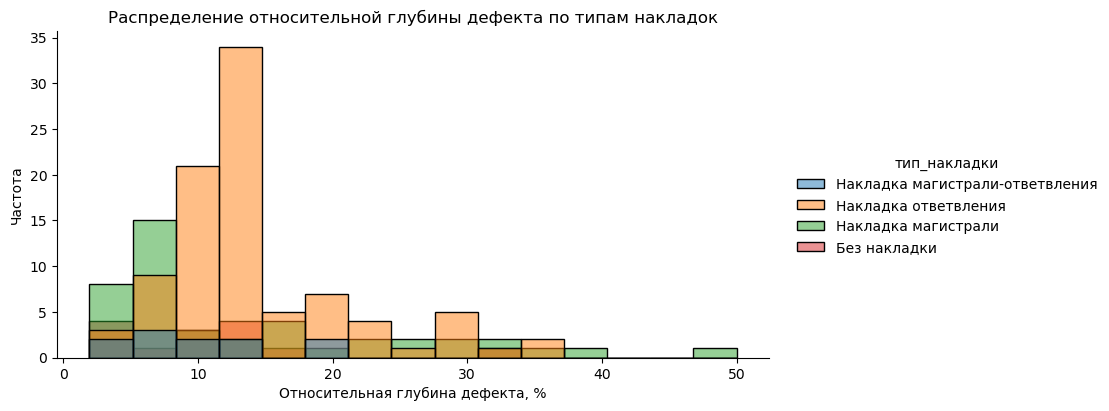

In [383]:
# Относительная глубина
sns.displot(data=df_TCN_75_crack, x="относительная_глубина_дефекта_%",hue='тип_накладки', height=4, aspect=2)
plt.title('Распределение относительной глубины дефекта по типам накладок')
plt.xlabel('Относительная глубина дефекта, %')
plt.ylabel('Частота')

Text(13.819444444444452, 0.5, 'Частота')

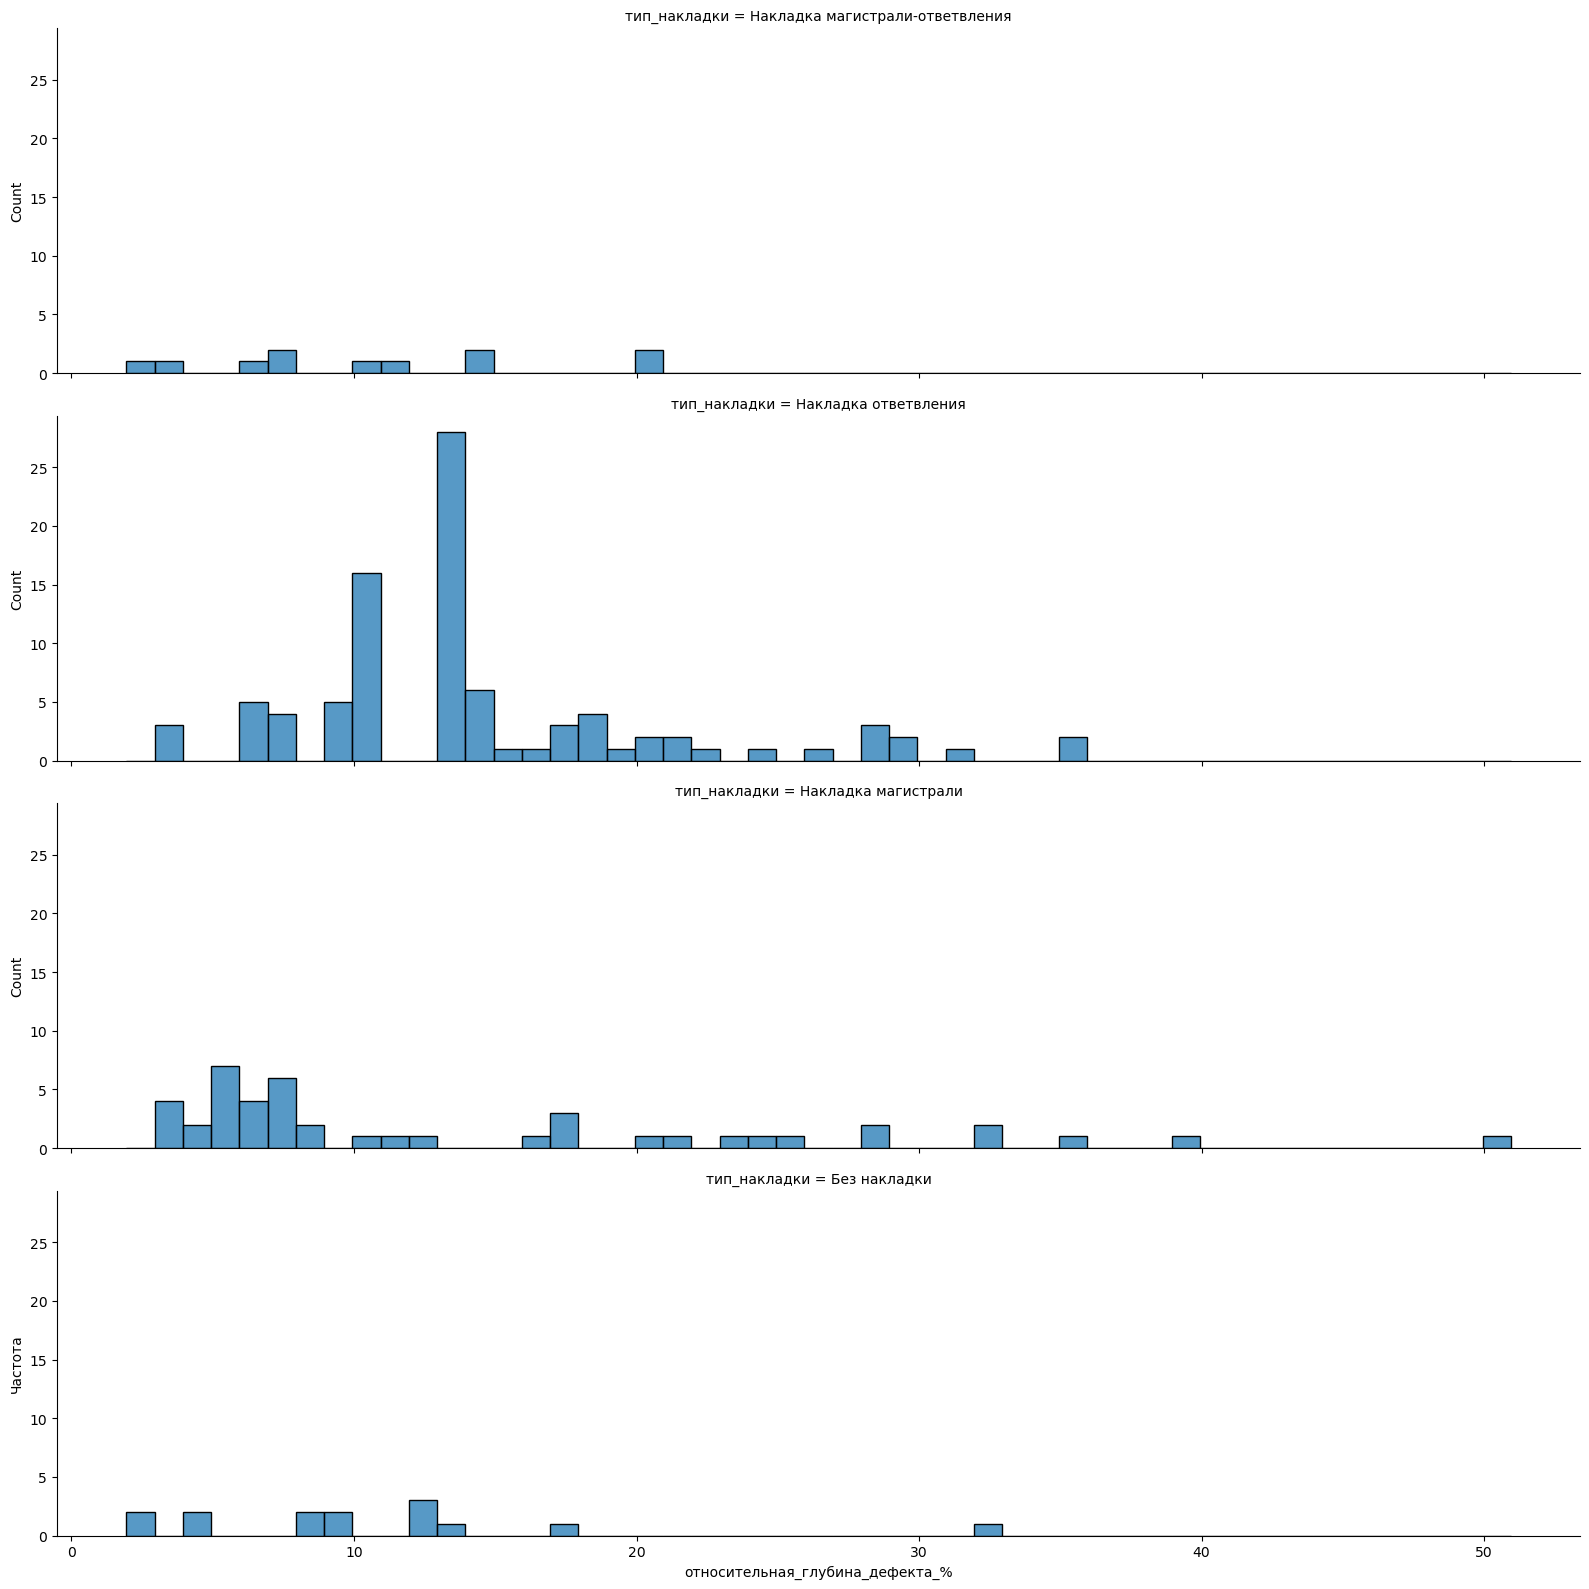

In [384]:
sns.displot(
    df_TCN_75_crack, x="относительная_глубина_дефекта_%", row="тип_накладки",
    binwidth=1, height=4, aspect=4)
plt.ylabel('Частота')

<AxesSubplot:xlabel='относительная_глубина_дефекта_%', ylabel='тип_накладки'>

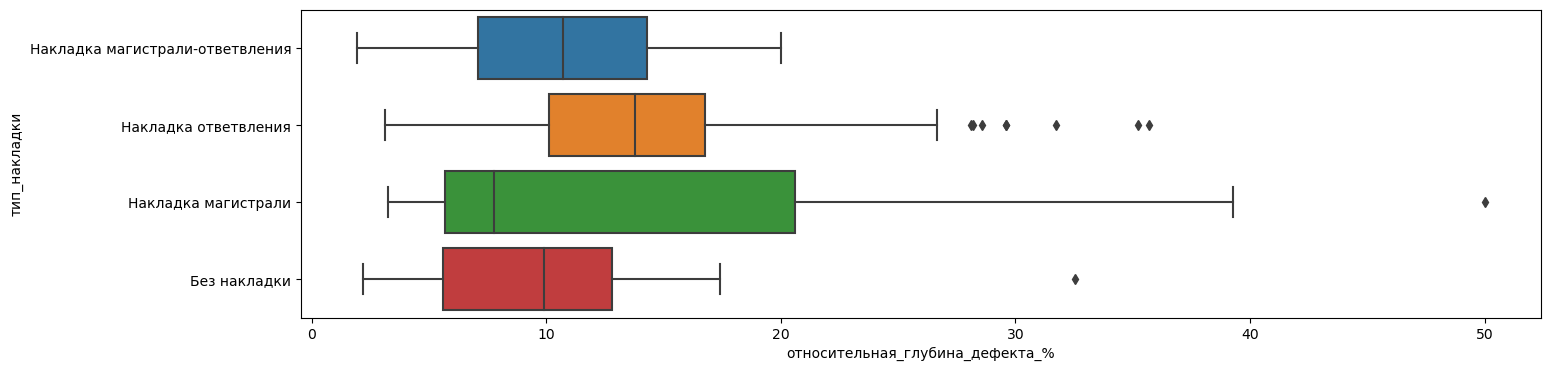

In [385]:
plt.figure(figsize=(16, 4))
sns.boxplot(data=df_TCN_75_crack, x='относительная_глубина_дефекта_%',y='тип_накладки')

**Q-Q plot**

In [386]:
# Данные для построения Q-Q plot по типам накладок
NMO =df_TCN_75_crack[ df_TCN_75_crack[ 'тип_накладки' ] == 'Накладка магистрали-ответвления' ].loc[:,'относительная_глубина_дефекта_%']
NO =df_TCN_75_crack[ df_TCN_75_crack[ 'тип_накладки' ] == 'Накладка ответвления' ].loc[:,'относительная_глубина_дефекта_%']
NM =df_TCN_75_crack[ df_TCN_75_crack[ 'тип_накладки' ] == 'Накладка магистрали' ].loc[:,'относительная_глубина_дефекта_%']
BN =df_TCN_75_crack[ df_TCN_75_crack[ 'тип_накладки' ] == 'Без накладки' ].loc[:,'относительная_глубина_дефекта_%']

Text(0.5, 1.0, 'Без накладки')

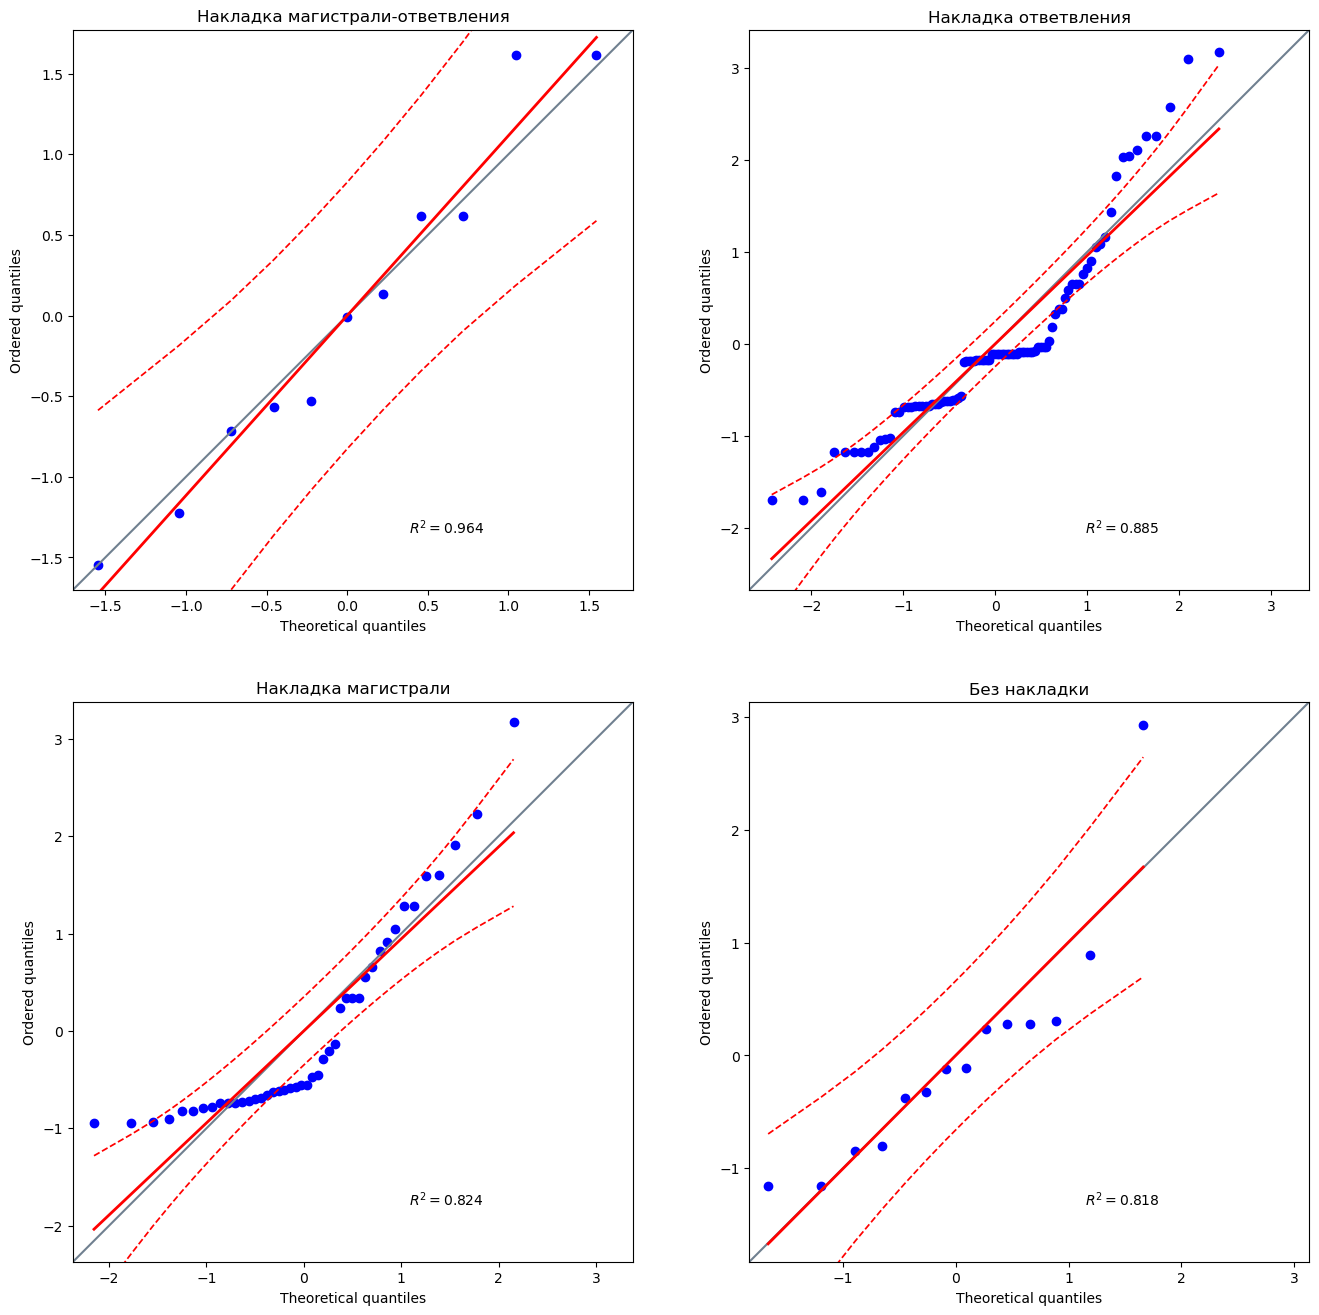

In [387]:
# Создаем фигуру с 2 строкой и 2 столбцами
fig, axes = plt.subplots(2, 2, figsize=(16, 16))  # Измените размер по вашему усмотрению

# Строим квантиль-квантиль графики на каждой из подсеток
pg.qqplot(NMO, dist='norm', ax=axes[0, 0])  # График 1 в первой подсетке
pg.qqplot(NO, dist='norm', ax=axes[0, 1])   # График 2 в первой подсетке
pg.qqplot(NM, dist='norm', ax=axes[1, 0])   # График 3 во второй подсетке
pg.qqplot(BN, dist='norm', ax=axes[1, 1])   # График 4 во второй подсетке

# Настройте заголовки и метки осей
axes[0, 0].set_title('Накладка магистрали-ответвления')
axes[0, 1].set_title('Накладка ответвления')
axes[1, 0].set_title('Накладка магистрали')
axes[1, 1].set_title('Без накладки')

**Тест Шапиро-Уилка**

In [388]:
# method Shapiro-Wilk test(default)
pg.normality(df_TCN_75_crack, dv='относительная_глубина_дефекта_%', group='тип_накладки')

,W,pval,normal
тип_накладки,,,
Накладка магистрали-ответвления,0.947673,6.143782e-01,True
Накладка ответвления,0.885363,7.548155e-07,False
Накладка магистрали,0.822377,9.304377e-06,False
Без накладки,0.838646,1.563010e-02,False


**Вывод**

По результатам оценки, `относительная_глубина_дефекта_%` в большей степени относится к распределению не починяющемуся законам нормального. Зафиксировано положительное срабатывание Теста Шапиро-Уилка, которое может быть обусловлено относительно малым количеством наблюдений для категории `Накладка магистрали-ответвления`.

Non-parametric
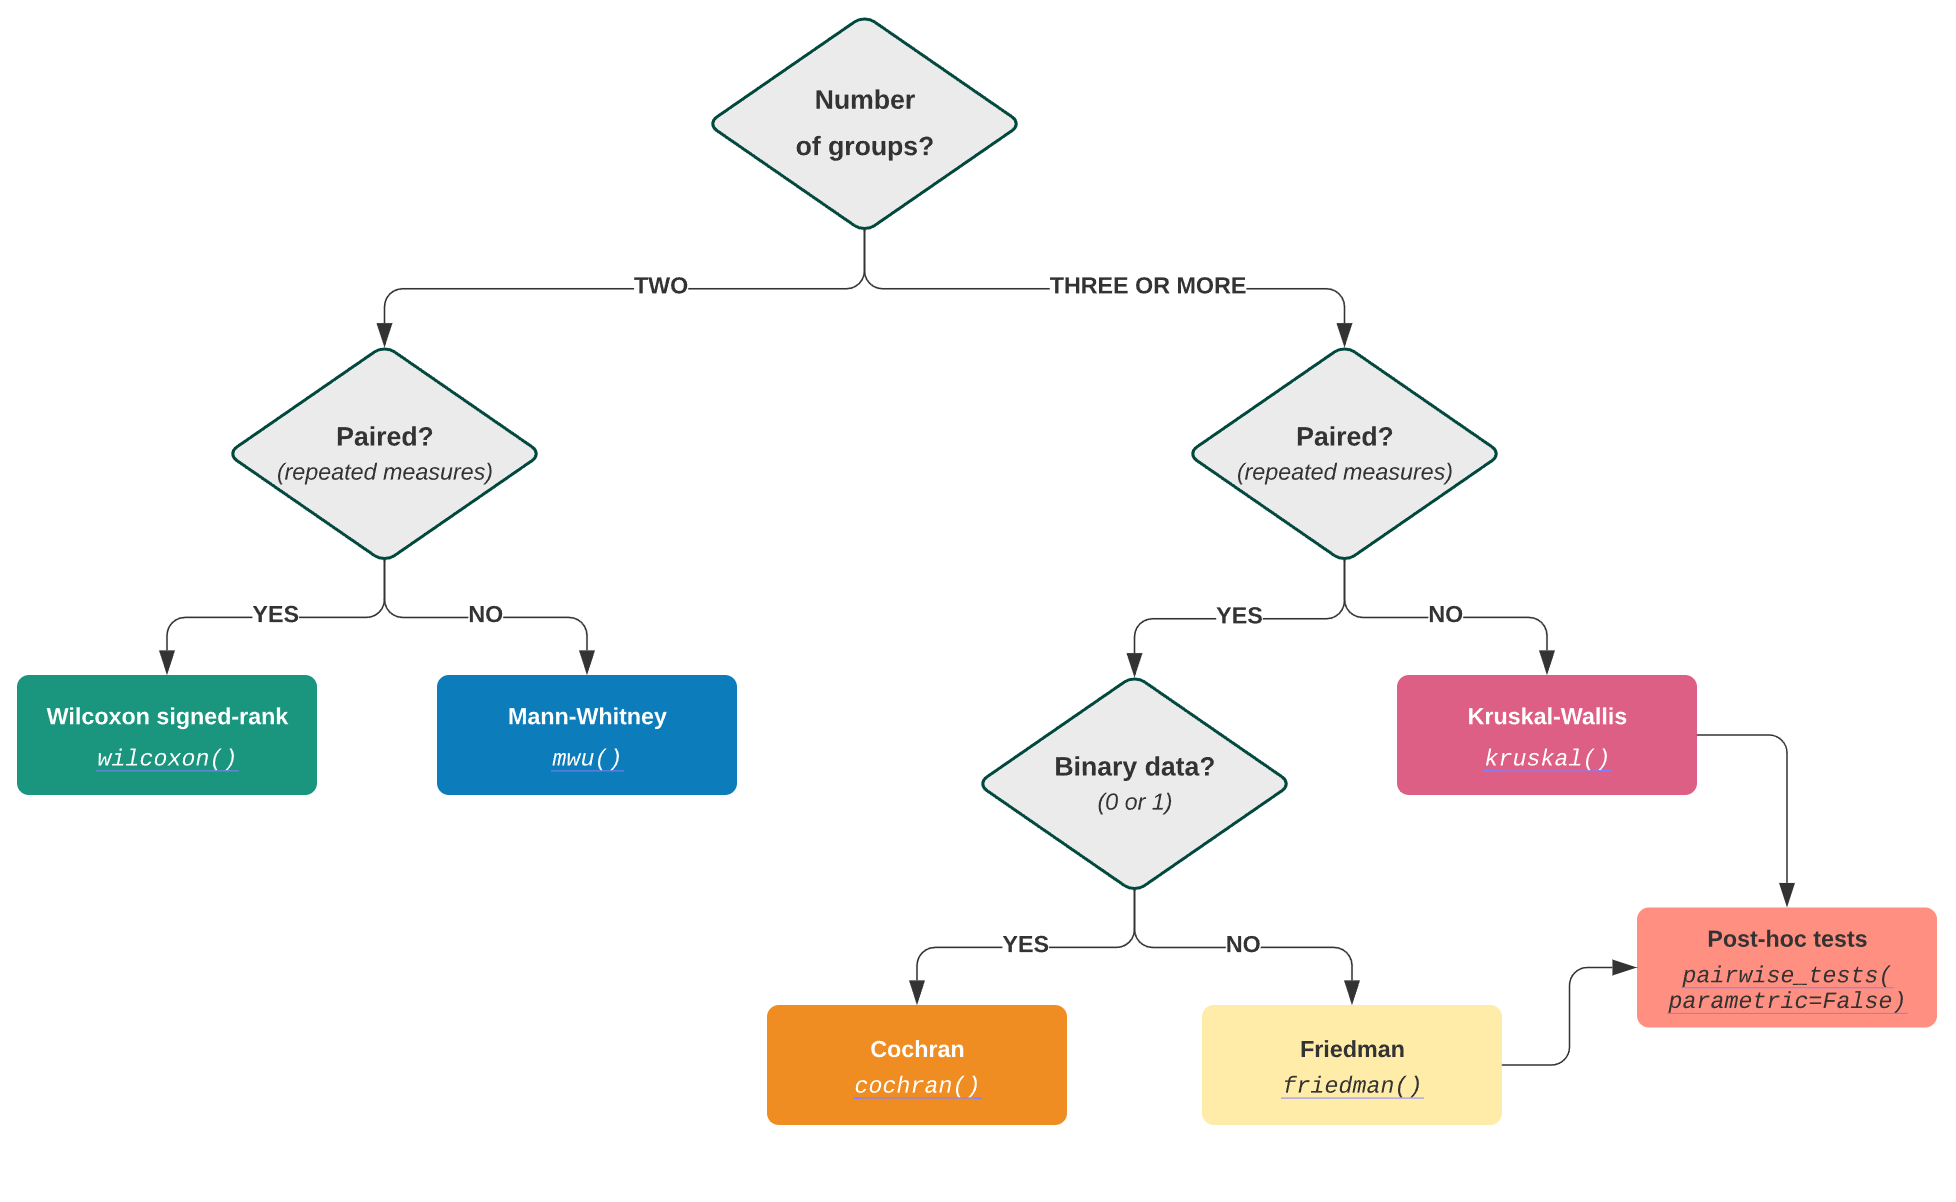

**Тест Крускала-Уоллиса**

In [389]:
pg.kruskal(data=df_TCN_75_crack, dv='относительная_глубина_дефекта_%', between='тип_накладки')

,Source,ddof1,H,p-unc
Kruskal,тип_накладки,3,10.024803,0.018356


**Post-hoc tests**

In [390]:
pg.pairwise_tests(data=df_TCN_75_crack, dv='относительная_глубина_дефекта_%', between='тип_накладки',parametric=False).round(3)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges
0,тип_накладки,Без накладки,Накладка магистрали,False,False,287.5,two-sided,0.716,-0.296
1,тип_накладки,Без накладки,Накладка магистрали-ответвления,False,False,74.0,two-sided,0.891,0.001
2,тип_накладки,Без накладки,Накладка ответвления,False,False,352.5,two-sided,0.007,-0.540
3,тип_накладки,Накладка магистрали,Накладка магистрали-ответвления,False,False,250.0,two-sided,0.875,0.299
4,тип_накладки,Накладка магистрали,Накладка ответвления,False,False,1550.0,two-sided,0.028,-0.059
5,тип_накладки,Накладка магистрали-ответвления,Накладка ответвления,False,False,380.5,two-sided,0.181,-0.558


**Вывод**


1) `Contrast` относится к сравнению между разными уровнями или группами.\
2) `A` и `B` представляют собой категории или уровни, которые сравниваются в каждом контрасте.\
3) `Paired` указывает, является ли сравнение связанным (True) или несвязанным (False).\
4) `Parametric` указывает, использовались ли параметрические предположения (True) или нет (False).\
5) `U-val` представляет собой значение U, обычно связанное с тестом Манна-Уитни.\
6) `Alternative` определяет тип альтернативной гипотезы (двусторонняя или односторонняя).\
7) `p-unc` - это уровень значимости, связанный с тестом, оценивающий статистическую значимость результатов.\
8) `Hedges` кажется быть эффектом размера Hedges' g, который количественно оценивает величину наблюдаемой разницы.

Hedges' g - это стандартизированный показатель, используемый для измерения размера эффекта в статистике. Он аналогичен показателю Cohen's d, но с поправкой на искажение из-за небольших выборок. Hedges' g учитывает размер выборки и может быть использован для оценки величины различий между двумя группами.

Знак Hedges' g указывает на направление различия между группами:

1. Положительное значение Hedges' g указывает на то, что первая группа (в данном случае, "А") имеет более высокое среднее значение по сравнению с второй группой ("B").

2. Отрицательное значение Hedges' g означает, что вторая группа ("B") имеет более высокое среднее значение по сравнению с первой группой ("A").

- Hedges' g около 0.2 указывает на малый размер эффекта.
- Hedges' g около 0.5 указывает на средний размер эффекта.
- Hedges' g ближе к 0.8 указывает на большой размер эффекта.

**Итерпритация результатов:**

1. Контраст между "Без накладки" и "Накладка магистрали" не показывает статистически значимой разницы (p-unc = 0.716). Эффект размера Hedges' g составляет -0.296 и отрицателен. Это указывает на то, что нет статистически значимой разницы между "Без накладки" и "Накладка магистрали" в относительной глубине дефекта. Отрицательное значение Hedges' g указывает на то, что, если есть разница, то "Накладка магистрали" может иметь немного более высокие значения относительной глубины дефекта.


2. Контраст между "Без накладки" и "Накладка магистрали-ответвления" также не показывает статистически значимой разницы (p-unc = 0.891). Эффект размера Hedges' g составляет 0.001 и близок к нулю. Это указывает на отсутствие статистически значимой разницы между этими двумя типами накладок в относительной глубине дефекта.


3. Контраст между "Без накладки" и "Накладка ответвления" показывает статистически значимую разницу (p-unc = 0.007). Эффект размера Hedges' g составляет -0.540 и отрицателен. Это означает, что "Накладка ответвления" имеет более высокие значения относительной глубины дефекта по сравнению с "Без накладки". Эффект размера является средним по величине и указывает на отрицательное направление различия.


4. Контраст между "Накладка магистрали" и "Накладка магистрали-ответвления" также не показывает статистически значимой разницы (p-unc = 0.875). Эффект размера Hedges' g составляет 0.299 и положителен. Это указывает на отсутствие статистически значимой разницы между этими двумя типами накладок в относительной глубине дефекта.


5. Контраст между "Накладка магистрали" и "Накладка ответвления" показывает статистически значимую разницу (p-unc = 0.028). Эффект размера Hedges' g составляет -0.059 и отрицателен. Это означает, что "Накладка ответвления" имеет более высокие значения относительной глубины дефекта по сравнению с "Накладка магистрали", хотя разница невелика. Эффект размера является малым и указывает на отрицательное направление различия.


6. Контраст между "Накладка магистрали-ответвления" и "Накладка ответвления" не показывает статистически значимой разницы (p-unc = 0.181). Эффект размера Hedges' g составляет -0.558 и отрицателен. Это указывает на то, что "Накладка ответвления" имеет более высокие значения относительной глубины дефекта по сравнению с "Накладка магистрали-ответвления". Эффект размера является малым и указывает на отрицательное направление различия.

Для групп, где зафиксированы стат. значимые различия, недостаточно оснований использовать общюю среднюю относительную глубину дефектов.

## Распределение количества дефектов по типам накладок

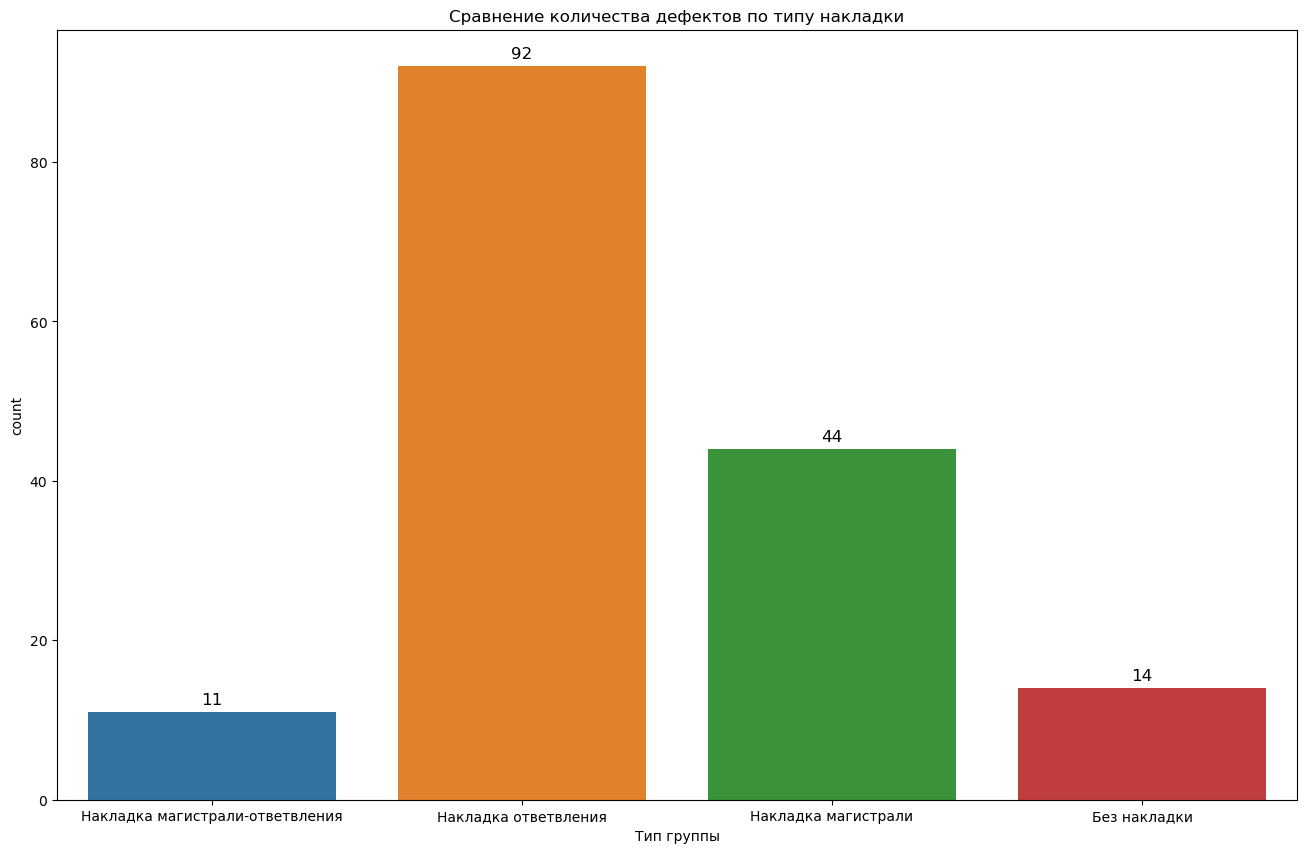

In [391]:
create_countplot_with_customization(
                                    data=df_TCN_75_crack,
                                    title='Сравнение количества дефектов по типу накладки',
                                    x_column='тип_накладки',
                                    x_label='Тип группы',
                                    annotate=True,
                                    h = 1,
                                    x_size=16,
                                    y_size=10
                                  )

## Регрессия количеств

Переменные:

**ЗП**
- `count_crack` - количество трещеноподобных дефектов на тройнике

**НП**
- `расположение_тройника` - примерное расположение тройника на ТТ КС
- `тип_накладки` - тип накладки определяющий конструкция тройника (БН, НМ, НО, НМО)
- `тип_по_dn` - равнопроходной / неравнопроходной тройник
- `завод_изготовитель` - завод изготовитель тройника определенный по клейму, паспорту, ТУ

In [392]:
count_crack = df_TCN_75_crack.groupby('N_тройника', as_index=False)\
                             .agg({'dn_обечайки': 'count'})\
                             .rename(columns={'dn_обечайки': 'count_crack'})

In [393]:
df_TCN_75_crack_neg = pd.merge(df_TCN_75_crack, count_crack, on='N_тройника', how='left')\
                        .drop_duplicates(subset='N_тройника')

Text(13.819444444444452, 0.5, 'Частота')

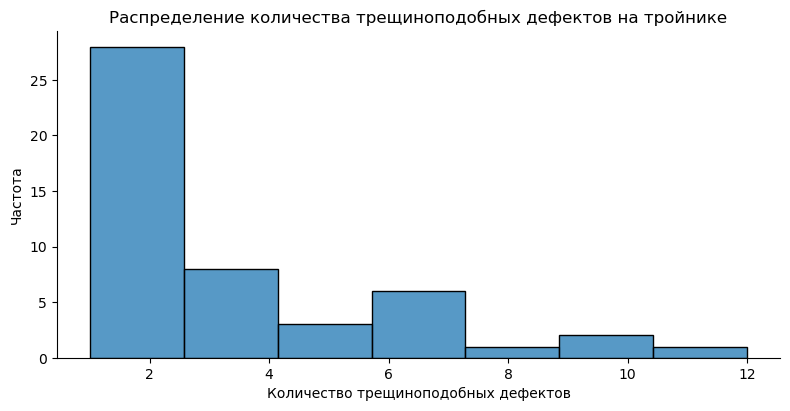

In [394]:
# Количество трещин на тройнике
sns.displot(data=df_TCN_75_crack_neg, x="count_crack", height=4, aspect=2)
plt.title('Распределение количества трещиноподобных дефектов на тройнике')
plt.xlabel('Количество трещиноподобных дефектов')
plt.ylabel('Частота')

### Регрессионная модель Пуассона

* Имя распределения - Пуассона
* Разброс значений - (0;$\infty$)
* Параметры - $\lambda$ (темп)
* Типичная функция связи - логарифм

In [395]:
pois = sf.glm('count_crack ~ срок_эксплуатации_троника + C(расположение_тройника) + C(тип_накладки) + C(тип_по_dn) + C(завод_изготовитель)', \
              family = sm.families.Poisson(), data = df_TCN_75_crack_neg).fit()
pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            count_crack   No. Observations:                   48
Model:                            GLM   Df Residuals:                       30
Model Family:                 Poisson   Df Model:                           17
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -84.088
Date:                Wed, 11 Oct 2023   Deviance:                       32.686
Time:                        22:52:40   Pearson chi2:                     32.0
No. Iterations:                     5   Pseudo R-squ. (CS):             0.7026
Covariance Type:            nonrobust                                         
====================================================================================================================================================================================
                                                                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                            8.8294      2.264      3.900      0.000       4.392      13.267
C(расположение_тройника)[T.Большое станционное кольцо]                                                               0.3775      0.351      1.076      0.282      -0.310       1.065
C(расположение_тройника)[T.Выходной шлейф]                                                                           1.1560      0.561      2.061      0.039       0.057       2.255
C(расположение_тройника)[T.ГПА]                                                                                      2.7483      0.613      4.481      0.000       1.546       3.950
C(расположение_тройника)[T.Коллектор высокого давления]                                                              1.5104      1.322      1.143      0.253      -1.080       4.101
C(расположение_тройника)[T.Коллектор низкого давления]                                                               0.8995      1.081      0.832      0.405      -1.219       3.018
C(расположение_тройника)[T.Линия транзита газа]                                                                      1.4406      0.629      2.290      0.022       0.208       2.673
C(расположение_тройника)[T.Малое станционное кольцо]                                                                 1.7672      0.618      2.858      0.004       0.556       2.979
C(расположение_тройника)[T.ПУ]                                                                                      -0.1707      0.636     -0.268      0.788      -1.417       1.076
C(тип_накладки)[T.Накладка магистрали]                                                                               1.5940      0.665      2.398      0.016       0.291       2.897
C(тип_накладки)[T.Накладка магистрали-ответвления]                                                                   0.8903      0.685      1.300      0.194      -0.452       2.233
C(тип_накладки)[T.Накладка ответвления]                                                                              0.7130      0.327      2.177      0.029       0.071       1.355
C(тип_по_dn)[T.Равнопроходной]                                                                                      -0.0531      0.562     -0.094      0.925      -1.154       1.048
C(завод_изготовитель)[T.ВПО Сюзнефтегазстройконструкция]                                                             0.3676      0.968      0.380      0.704      -1.529       2.265
C(заво

**Вывод:**

Количество трещиноподобных дефектов

Растет в зависимости от принадлежности тройника к заводу **Новосинеглазовский комбинат строительных конструкций** по конструкции накладки "Накладка ответвления, **Накладка магистрали**" при расположении на ТТ КС "ГПА, Выходной шлейф, Малое станционное кольцо, Линия транзита газа". Наибольшее влияние оказывает **ГПА** и **Малое станционное кольцо**.

При изменении срока эксплуатации на 1 год вероятность образования трещиноподобного дефекта уменьшается на -0.3108 в пределах \[-0.465 -0.156].

Известно, развитие технологий изготовления и методов учета эксплуатационных нагрузок, способствовало снижения коэффициента запаса прочности. Уменьшение вероятности образования трщиноподобных дефектов для старых тройниковых соединений (в районе 27-38 лет), может быть связано с относительно высоким коэффициентом запаса прочности, для старых образцов тройниковых соединений. В результатае, данный факт мог повлиять на результата анализа. В дальнейшем, необходмо учетьсь историческое изменение коэффицента запаса прочности, для проверки данной гипотизы. Данный факт зафиксирован только в разрезе трещиноподобных дефектов.

In [396]:
df_TCN_75_crack.срок_эксплуатации_троника.agg(['min','max'])

min    27
max    38
Name: срок_эксплуатации_троника, dtype: int64

#### Проблемы сверхдисперсии

Расчет сверхдисперсии:

In [397]:
pois.pearson_chi2/pois.df_resid

1.0662074585183567

Для модели Пуассона значение сверхдисперсии должно быть близко к 1. Модель релеванта и описывает примерно **71.37%** от общей дисперсии данных.

Продолжи анализ и проведем сравнение моделей с помощью информационного критерия Акаике (AIC).

### Отрицательная биномиальная модель

* Имя распределения - отрицательное биномиальное
* Разброс значений - (0;$\infty$)
* Параметры - $\mu$ (среднее), $\theta$/$\alpha$ (форма/дисперсия)
* Типичная функция связи - логарифм

Когда строим модель, обращаем внимание на аргумент `alpha` - это параметр дисперсии. От него зависит сходимость результатов, поэтому в случае ошибок рекомендуется ставить его в диапазоне от 0.1 до 2.

In [398]:
neg = sf.glm('count_crack ~ срок_эксплуатации_троника + C(расположение_тройника) + C(тип_накладки) + C(тип_по_dn) + C(завод_изготовитель)', data = df_TCN_75_crack_neg, \
             family = sm.families.NegativeBinomial(alpha=0.1)).fit()
neg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            count_crack   No. Observations:                   48
Model:                            GLM   Df Residuals:                       30
Model Family:        NegativeBinomial   Df Model:                           17
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -86.146
Date:                Wed, 11 Oct 2023   Deviance:                       23.746
Time:                        22:52:40   Pearson chi2:                     22.3
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5926
Covariance Type:            nonrobust                                         
====================================================================================================================================================================================
                                                                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                            8.5319      2.456      3.474      0.001       3.719      13.345
C(расположение_тройника)[T.Большое станционное кольцо]                                                               0.3445      0.395      0.873      0.383      -0.429       1.118
C(расположение_тройника)[T.Выходной шлейф]                                                                           1.0935      0.624      1.753      0.080      -0.129       2.316
C(расположение_тройника)[T.ГПА]                                                                                      2.7043      0.684      3.951      0.000       1.363       4.046
C(расположение_тройника)[T.Коллектор высокого давления]                                                              1.3770      1.451      0.949      0.343      -1.466       4.220
C(расположение_тройника)[T.Коллектор низкого давления]                                                               0.7932      1.146      0.692      0.489      -1.453       3.039
C(расположение_тройника)[T.Линия транзита газа]                                                                      1.4223      0.697      2.041      0.041       0.057       2.788
C(расположение_тройника)[T.Малое станционное кольцо]                                                                 1.7198      0.675      2.546      0.011       0.396       3.044
C(расположение_тройника)[T.ПУ]                                                                                      -0.1232      0.672     -0.183      0.855      -1.441       1.194
C(тип_накладки)[T.Накладка магистрали]                                                                               1.6235      0.733      2.213      0.027       0.186       3.061
C(тип_накладки)[T.Накладка магистрали-ответвления]                                                                   0.9127      0.776      1.176      0.240      -0.609       2.435
C(тип_накладки)[T.Накладка ответвления]                                                                              0.6995      0.375      1.863      0.062      -0.036       1.435
C(тип_по_dn)[T.Равнопроходной]                                                                                      -0.0132      0.625     -0.021      0.983      -1.238       1.211
C(завод_изготовитель)[T.ВПО Сюзнефтегазстройконструкция]                                                             0.3621      1.058      0.342      0.732      -1.713       2.437
C(заво

**Вывод:**


Количество трещиноподобных дефектов

Результаты примерно те же, но **некоторые** предикторы **утратили статистическую значимость** (например, завод изготовитель "Новосинеглазовский комбинат строительных конструкций" и "Накладка ответвления").

При изменении срока эксплуатации на 1 год вероятность образования трещиноподобного дефекта уменьшается на -0.3007 в пределах \[-0.469 -0.132].

#### Проблемы сверхдисперсии

Расчет сверхдисперсии:

In [399]:
neg.pearson_chi2/neg.df_resid

0.7426502567887177

Сравним модели с помощью информационного критерия Акаике (AIC):

- Его абсолютное значение ничего не значит, полезен только для сравнения моделей
- Чем он ниже, тем лучше модель

Мы можем сравнить два разных типа моделей через AIC (при условии, что ЗП и НП одинаковые):

In [400]:
print(pois.aic)
print(neg.aic)

204.1755901959766
208.2919541646301


Предиктивная способность модели Пуассона лучше.

### Мультиномиальная регрессия

* Имя распределения - мультиномиальное
* Разброс значений - (1...$n$)
* Параметры - $p_1$...$p_n$ (вероятность каждого события), $n$ (количество попыток)
* Типичная функция связи - мультиномиальный логит

### Детальное расположение дефекта

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Сварное соединение накладка магистрали-магистраль'),
  Text(1, 0, 'Сварное соединение накладка ответвления-ответвление'),
  Text(2, 0, 'Сварное соединение накладка магистрали-накладка магистраль'),
  Text(3, 0, 'Сварное соединение накладка магистрали-ответвление'),
  Text(4, 0, 'Сварное соединение накладка магистрали-накладка ответвления'),
  Text(5, 0, 'КСС магистраль-труба'),
  Text(6, 0, 'КСС ответвление-труба'),
  Text(7, 0, 'КСС катушка-труба'),
  Text(8, 0, 'Основной металл ответвления'),
  Text(9, 0, 'Продольное сварное соединение накладка магистрали-накладка магистрали'),
  Text(10, 0, 'Продольное сварное соединение магистрали'),
  Text(11, 0, 'ОКШЗ КСС ответвление-труба'),
  Text(12, 0, 'ОКШЗ КСС магистраль-труба')])

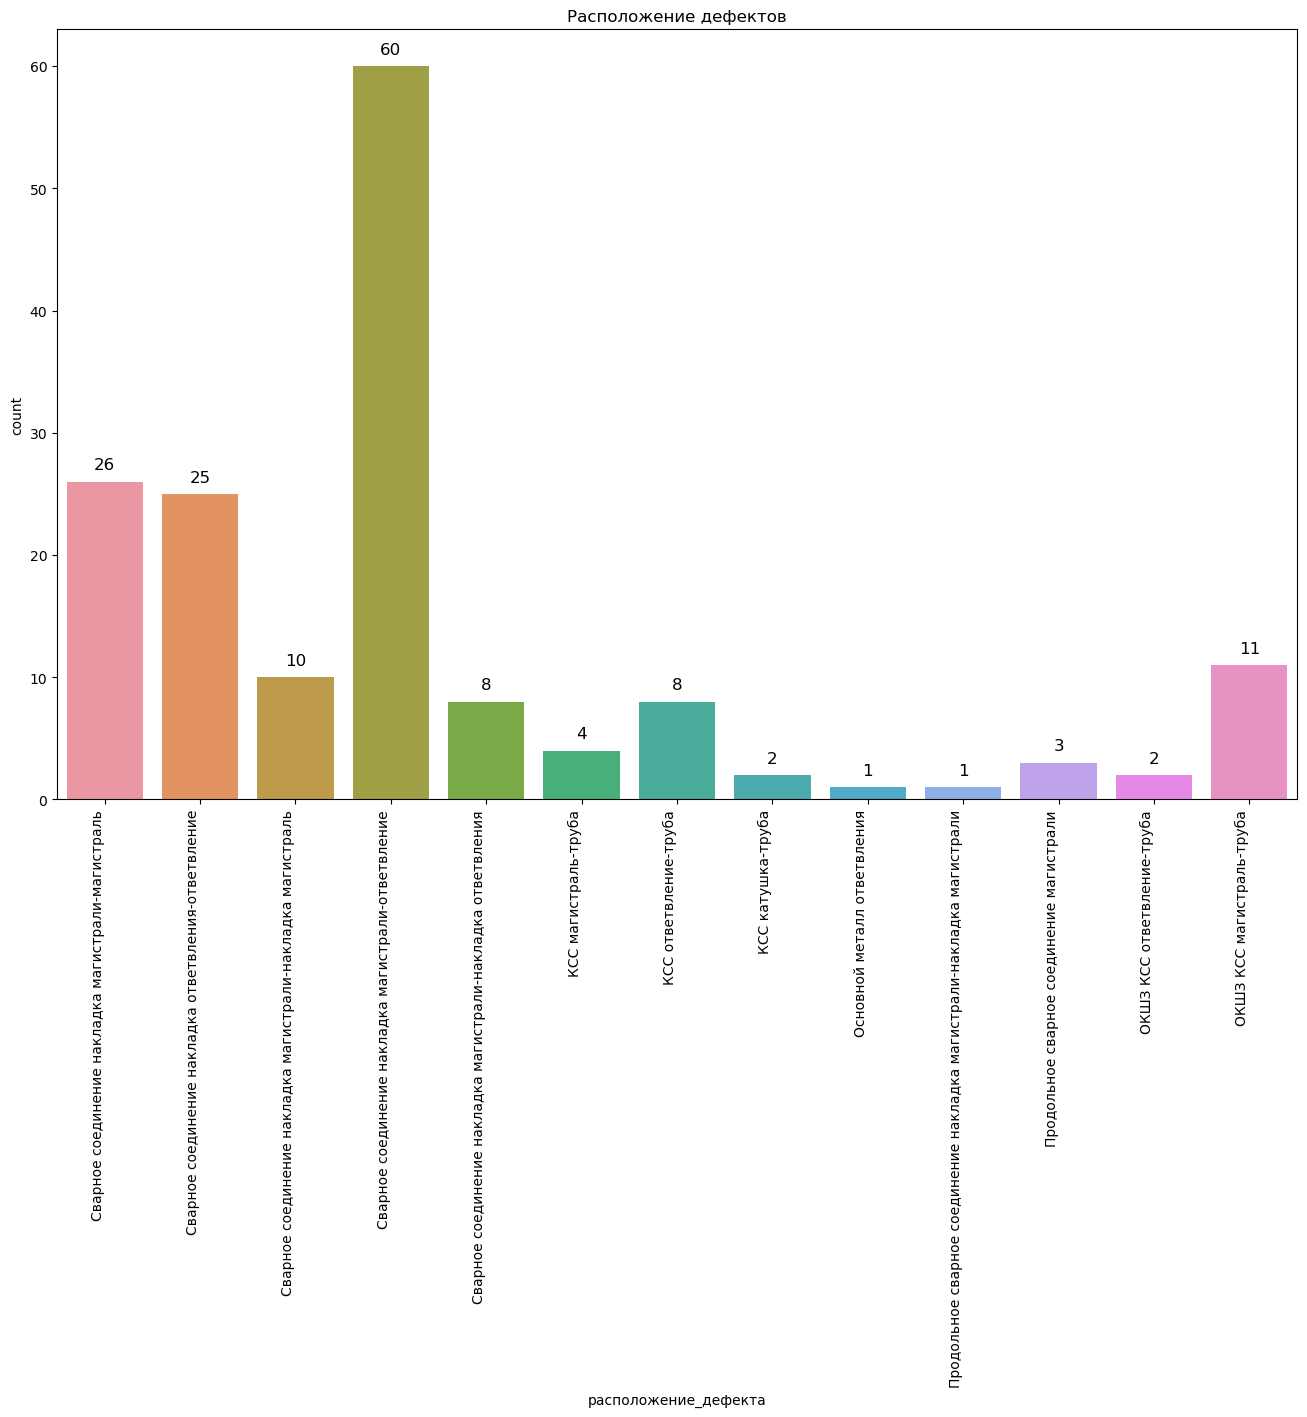

In [401]:
create_countplot_with_customization(
                                    data=df_TCN_75_crack,
                                    title='Расположение дефектов',
                                    x_column='расположение_дефекта',
                                    #x_label='Тип группы',
                                    annotate=True,
                                    h = 1,
                                    x_size=16,
                                    y_size=10
                                  )
plt.xticks(rotation=90, ha='right')

**Вывод**\
Ввиду недостаточного объема информации, мультиномиальная регресия выдает значение `nan`. При данной выборке более детальная интерпритация данных через мультиномальную регрессию затруднительно или невозможно.

### Обобщенный критерий расположения дефекта

Применим мультиномиальную регрессию к более обощенному параметру расположения дефекта. 
Только с разделением на:
- `Обечайка` 
- `Ответвленение`.

(array([0, 1]), [Text(0, 0, 'Обечайка'), Text(1, 0, 'Ответвление')])

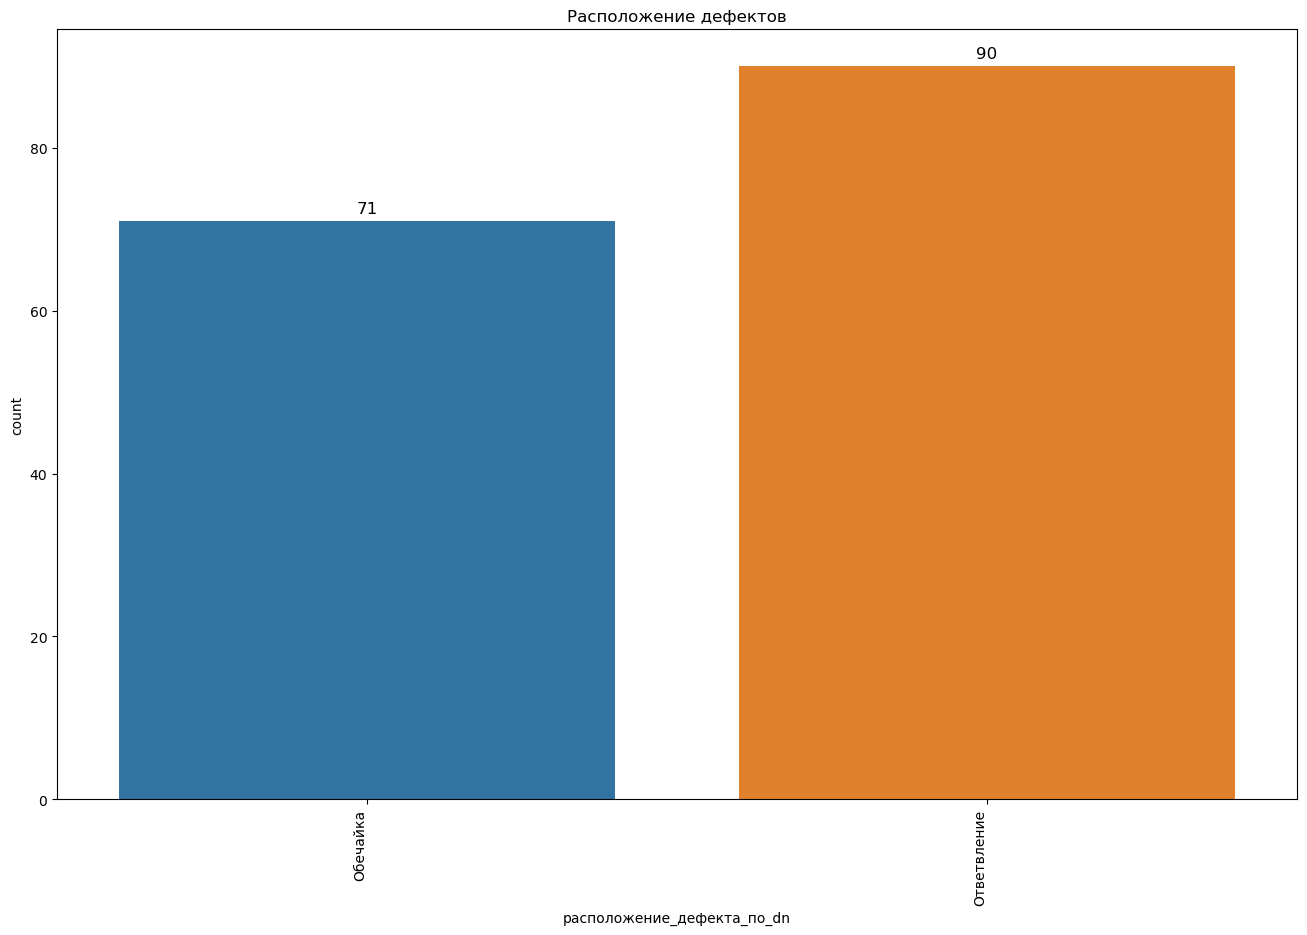

In [406]:
create_countplot_with_customization(
                                    data=df_TCN_75_crack,
                                    title='Расположение дефектов',
                                    x_column='расположение_дефекта_по_dn',
                                    #x_label='Тип группы',
                                    annotate=True,
                                    h = 1,
                                    x_size=16,
                                    y_size=10
                                  )
plt.xticks(rotation=90, ha='right')

In [408]:
df_TCN_75_crack[['расположение_дефекта_по_dn', 
                 'расположение_дефекта_по_dn_factorize']]\
                                       .drop_duplicates()\
                                       .rename(columns={'расположение_дефекта_по_dn_factorize':'factorize'})

,расположение_дефекта_по_dn,factorize
0,Обечайка,1
1,Ответвление,2


In [409]:
multi_res = sf.mnlogit('расположение_дефекта_по_dn_factorize ~ срок_эксплуатации_троника', df_TCN_75_crack).fit()
multi_res.summary()

Optimization terminated successfully.
         Current function value: 0.627963
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   MNLogit Regression Results                                   
================================================================================================
Dep. Variable:     расположение_дефекта_по_dn_factorize   No. Observations:                  161
Model:                                          MNLogit   Df Residuals:                      159
Method:                                             MLE   Df Model:                            1
Date:                                  Wed, 11 Oct 2023   Pseudo R-squ.:                 0.08483
Time:                                          22:52:41   Log-Likelihood:                -101.10
converged:                                         True   LL-Null:                       -110.47
Covariance Type:                              nonrobust   LLR p-value:                 1.497e-05
==========================================================================================================
расположение_дефекта_по_dn_factorize=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                -12.5523      3.300     -3.803      0.000     -19.021      -6.084
срок_эксплуатации_троника                  0.3828      0.099      3.878      0.000       0.189       0.576
==========================================================================================================
"""

**Вывод:**

1. `Current function value: 0.627963`: Это значение отражает текущее значение функции правдоподобия, которую модель пытается оптимизировать. Чем ближе это значение к нулю, тем лучше модель соответствует данным.

1. `Iterations 5`: Это количество итераций, которые потребовались для сходимости модели. Модель прошла 6 итераций, чтобы достичь оптимальных параметров.

1. `No. Observations: 161`: Это количество наблюдений, используемых для оценки модели.

1. `Pseudo R-squ.: 0.08483`: значение Pseudo R-squared, которое указывает на то, что ваша модель объясняет примерно 8.48% вариабельности в данных. Означает, что модель объясняет около 8.48% различий в распределении категорий в зависимой переменной.

1. `расположение_дефекта_по_dn_factorize=2`: категория зависимой переменной, для которой представлены коэффициенты модели.

1. `Intercept -12.5523`: Это значение коэффициента для интерцепта (константы) в модели. Он указывает на базовый уровень (когда все остальные факторы равны нулю или отсутствуют) и в данном случае отрицателен.

1. `срок_эксплуатации_троника 0.3828`: Это значение коэффициента для переменной "срок_эксплуатации_троника". Увеличение срока эксплуатации на 1 год приводит к увеличению шанса возникновения дефекта на ответвлении, соответствующем категории "расположение_дефекта_по_dn_factorize=2", примерно на 0.3828 относительно базового уровня, т.е. относительно обечайки.

Интерпретация этого коэффициента может быть следующей: "При увеличении срока эксплуатации на 1 год, вероятность возникновения дефекта на ответвлении, соответствующем категории 'расположение_дефекта_по_dn_factorize=2', увеличивается примерно на 0.3828 относительно базового уровня".

Таким образом, этот результат позволяет оценить влияние срока эксплуатации на вероятность возникновения дефекта в данной категории расположения. 

## Заключение



Проведено сравнеие групп (тройников с разным типо накладок) по сроку эксплуатации тройника, часовой ориентации начала, длине, относительной глубине дефекта.

**Срок эксплуатации тройниковых соединений**

Статистически значимые различия зафиксированы:

- "Без накладки" и "Накладка магистрали" в категории "тип_накладки". Тест показал значение p-уровня (p-unc = 0.000), что указывает на существенную разницу между этими двумя категориями. Эффект размера Hedges' g составляет 1.463 и является положительным. Это означает, что "Накладка магистрали" в среднем имеет более высокие значения срока эксплуатации по сравнению с "Без накладки" на 1.463 стандартных отклонения. Этот эффект размера является большим.
- "Без накладки" и "Накладка ответвления" уровень значимости p равен 0.046, меньше 0.05, что указывает на существенную разницу. Эффект размера Hedges' g составляет -0.242 и отрицателен. Это означает, что "Накладка ответвления" в среднем имеет более высокое значения срока эксплуатации по сравнению с "Без накладки" на 0.242 стандартных отклонения. Этот эффект размера также является малым, но в противоположном направлении.
- "Накладка магистрали" и"Накладка ответвления" уровень значимости p составляет 0.000 и эффекты размера Hedges' g -1.188, что говорит о более высоком среднем значении "Накладка ответвления" относительно "Накладка магистрали" на 1.188 стандартного отклонения.

**Часовая ориентация начала дефектов**

- Сравнение по всем кобинациям, показало отсутствие статистически значимого результа. Другими словами наша выборка не позваляет зафиксировать различия между группами и утверждать, что часовая ориентациия зависти от типа накладки тройникового соединения. Принимаем H0 об отсутствии стат. значимых различиях между группами по типам накладок-часовой ориентации начала дефекта. Т.е. дефект часта встречающийся, например на 8 часов, так же будет часто встречаться на тройниках с другим типом накладок. Однка в данном сравнении не учитывается множетсва других эксплуатационных факторов.

**Длина дефектов**

Статистически значимые различия зафиксированы:

- Контраст между "Без накладки" и "Накладка магистрали" показывает статистически значимую разницу (p-unc = 0.009). Эффект размера Hedges' g составляет 0.413 и положителен. Это означает, что средняя длина дефекта в миллиметрах для "Накладка магистрали" ниже, чем для "Без накладки" на 0.413 стандартных отклонения. Эффект размера является средним по величине.

- Контраст между "Накладка магистрали" и "Накладка ответвления" показывает статистически значимую разницу (p-unc = 0.000). Эффект размера Hedges' g составляет 0.444 и положителен. Это означает, что средняя длина в миллиметрах для "Накладка ответвления" ниже, чем для "Накладка магистрали" на 0.444 стандартных отклонения. Эффект размера является средним по величине.

**Относительная глубина дефектов**

Статистически значимые различия зафиксированы:

- Контраст между "Без накладки" и "Накладка ответвления" показывает статистически значимую разницу (p-unc = 0.007). Эффект размера Hedges' g составляет -0.540 и отрицателен. Это означает, что "Накладка ответвления" имеет более высокие значения относительной глубины дефекта по сравнению с "Без накладки". Эффект размера является средним по величине и указывает на отрицательное направление различия.

- Контраст между "Накладка магистрали" и "Накладка ответвления" показывает статистически значимую разницу (p-unc = 0.028). Эффект размера Hedges' g составляет -0.059 и отрицателен. Это означает, что "Накладка ответвления" имеет более высокие значения относительной глубины дефекта по сравнению с "Накладка магистрали", хотя разница невелика. Эффект размера является малым и указывает на отрицательное направление различия.

Если судить по результтам проведенных тестов чаще в качестве статистически различимых групп выступают комбинации "Без накладки"-"Накладка магистрали" и "Накладка магистрали"-"Накладка ответвления". У нас недостаточно оснований использовать общуюю меру центральной тенденции (например, среднее или медиану), для групп по которым зафиксированы статистически значимые различия.

**Оценка влияния конструкционных особенностей и эксплуатационных факторов на образование трещеноподобных дефектов тройниковых соединений с помощью обобщенных линейных моделей**

В рамках настойщей работы произведена оценка влияния контруктивных и эксплуатационных факторов на образование трещеноподобных дефектов с помощью обощенных линейных моделей: регрессионной модели Пуассона, Отрицательной биномиальной модели. 
По результатам итерационного моделирования, количество трещиноподобных дефектов увеличивается в зависимости от принадлежности тройника к заводу-изготовителю "Новосинеглазовский комбинат строительных конструкций" по типу накладки "Накладка ответвления, Накладка магистрали" при расположении на ТТ КС "ГПА, Выходной шлейф, Малое станционное кольцо, Линия транзита газа". Наибольшее влияние оказывает ГПА и Малое станционное кольцо.

При изменении срока эксплуатации на 1 год вероятность образования трещиноподобного дефекта уменьшается на -0.3108 в пределах [-0.465 -0.156].

Как известно с развитие технологий изготовления и методов учета эксплуатационных нагрузок, способствовало снижения коэффициента запаса прочности. Уменьшение вероятности образования трщиноподобных дефектов для старых тройниковых соединений (в районе 27-38 лет), может быть связано с относительно высоким коэффициентом запаса прочности, для старых образцов тройниковых соединений. В результатае, данный факт мог повлиять на результат анализа. В дальнейшем, необходимо учесть историческое изменение коэффицента запаса прочности, для подтверждения данной гипотизы. Данный факт зафиксирован только в разрезе трещиноподобных дефектов.

Выполнено сравнение модели с помощью информационного критерия Акаике (AIC). Согласно, которому AIC_Пуассона = 204 оказался меньше чем AIC_ОБМ = 208. Меньшее значение AIC_Пуассона свидетельсвует, что предиктивная способность модели лучше, модель описывает примерно 71% дисперсии.

Проведена попытка применить Мультиномиальная регрессию, с целью оценки влияния конструктивных особенностей тройников и эксплуатационных фатокров на место образования трещеноподобного дефекта. Ввиду недостаточного объема информации, мультиномиальная регресия выдает значение nan при высокой детализации расположения дефекта. Небольшая выборка значительно усложняет или не позволяет детально интерпритировать данные через мультиномальную регрессию.
Чтобы устранить проблему nan, принято решение уменьшить количество предикторов до расположения дефекта на "Обечайке" и "Ответвлении". В результате, сходимости достигла модель оценивающая влияние срока эксплуатации на место образования дефекта.

По результатм интерпретация коэффициента `срок_эксплуатации_троника 0.3828` может быть следующей: 
"При увеличении срока эксплуатации на 1 год, вероятность возникновения дефекта на ответвлении, соответствующем категории 'расположение_дефекта_по_dn_factorize=2', увеличивается примерно на 0.3828 относительно Обечайки".

Результат оценки влияния срока эксплуатации на образования трещеноподобных дефектов по регрессионной модели Пуассона (-0.3108) значительно отличается от вероятности Мультиномиальной регрессии (0.3828). Причины предстоит выяснить.

**Дальнейшим развитием работы, является:**

1. Оценка в абсолютных велечинах размера эффекта Hedges' g. Формулировка, что в действительности для тройникового соединения относиться к малому, среднему и большому эффекту.
2. Понять причину различий при оценке вероятности возникновения трещеноподобных дефектов в зависимости от срока эксплуатации.
3. Увеличить объем и детализацию данных для более подробного анализа мест образования дефектов.
4. Выявление новых зависимостей.